In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon' 

train_data_path = join(data_dir, 'sales_train.csv') 

# data ÏùΩÏñ¥Î≥¥Í∏∞

sales_train.csv Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [3]:
data = pd.read_csv(train_data_path)
print('train data dim : {}'.format(data.shape))

train data dim : (2935849, 6)


# Ïù¥ÏÉÅÍ∞í ÏïåÏïÑÎ≥¥Í∏∞
ÌåêÎß§ÎüâÏù¥ ÏùåÏàòÎ°ú Îì§Ïñ¥Ïò§Îäî Í≤ΩÏö∞Ïóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†Íπå Ïã∂Ïñ¥ÏÑú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î∂ÑÏÑùÌï¥Î≥¥ÏïòÎã§. Ï≤òÏùåÏóêÎäî ÏûòÎ™ª ÏûÖÎ†•Îêú Ï§Ñ ÏïåÍ≥† ÏñëÏàòÎ°ú Î∞îÍæ∏Î†§Í≥† ÌñàÎäîÎç∞ Ïñ¥Îñ§ Ï∂îÏÑ∏Í∞Ä Î≥¥Ïù¥Îäî Í≤ΩÏö∞ÏóêÎäî Ï†úÏô∏ÌïòÏßÄ ÏïäÍ≥† Ïì∏ ÏòàÏ†ïÏù¥Îã§. 

In [7]:
anomal_count = train_data['item_cnt_day'].map(lambda x : x < 0.0)
anomal_count = train_data[anomal_count]
print(anomal_count)

               date  date_block_num  shop_id  item_id  item_price  \
2        05.01.2013               0       25     2552       899.0   
148      23.01.2013               0       25     2321       999.0   
175      07.01.2013               0       25     2199      1449.0   
807      02.01.2013               0       25     2330       599.0   
1041     13.01.2013               0       25     5034      1989.0   
...             ...             ...      ...      ...         ...   
2934243  26.10.2015              33       25     3917       449.0   
2934462  18.10.2015              33       25     4896      6398.0   
2935263  05.10.2015              33       25    10039       249.0   
2935643  16.10.2015              33       25     7893      2990.0   
2935779  07.10.2015              33       25     7087       999.0   

         item_cnt_day  
2                -1.0  
148              -1.0  
175              -1.0  
807              -1.0  
1041             -1.0  
...               ...  
293

ÌïòÎ£® ÌåêÎß§ÎüâÏù¥ -Ïù∏ Í∞íÎì§ÏùÑ Î™®ÏïÑÏÑú ÌòπÏãú Í∞Å Í∞í Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(ex: ÌäπÏ†ï ÌíàÎ™©ÏóêÏÑú Ïú†ÎèÖ ÌïòÎ£® Îß§Ï∂úÎüâ ÏóêÎü¨Í∞Ä ÎÇúÎã§Í±∞ÎÇò)Í∞Ä ÏûàÎäîÏßÄ ÏÇ¥Ìé¥Î¥§ÎäîÎç∞, ÌäπÏ†ï item idÏóê ÏÇ¥Ïßù Î™∞Î†§ ÏûàÎäî Í≤ÉÍ≥º, ÌïòÎ£® ÌåêÎß§ÎüâÏù¥ -1Î∂ÄÌÑ∞ -5Ï†ïÎèÑÍπåÏßÄ Îã§ÏñëÌïòÍ≤å Ï°¥Ïû¨ÌïúÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§. Ï≤´Î≤àÏß∏Î°úÎäî Ïñ¥Îñ§ item idÏóêÏÑú ÌåêÎß§ÎüâÏù¥ Ïò§Î•òÍ∞Ä ÎÇ¨ÎäîÏßÄ Ï¢Ä Îçî ÏÇ¥Ìé¥Î≥º ÏòàÏ†ïÏù¥Í≥†, ÎëêÎ≤àÏß∏Î°úÎäî Í≤∞Ï∏°ÏπòÎÇò ÎßàÏ∞¨Í∞ÄÏßÄÏù∏ Ïù¥ÏÉÅÍ∞íÏù¥ ÏïÑÎãå Ïô†ÏßÄ ÏûÖÎ†•Í≥ºÏ†ïÏóêÏÑú Î∂ÄÌò∏Í∞Ä Îí§Î∞îÎÄåÏñ¥ÏÑú Îì§Ïñ¥Í∞îÏùÑ Í∞ÄÎä•ÏÑ±ÏùÑ ÏÉùÍ∞ÅÌï† Ïàò ÏûàÍ≤å ÎêòÏóàÎã§. Í∑∏ÎûòÏÑú Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏûëÏóÖÏùÑ Ìï¥Î≥¥Î†§Í≥† ÌïúÎã§. 
1. Ïñ¥Îñ§ ÏÉÅÌíàÏóêÏÑú ÌïòÎ£® ÌåêÎß§Îüâ Ïò§Î•òÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ ÏùºÏñ¥ÎÇ¨ÎÇò
2. 1Ïù¥ ÌååÏïÖÎêú ÌõÑÏóê Ïù¥ÏÉÅÏπòÏùò Î∂ÄÌò∏Î•º Î∞îÎ°úÏû°ÏïÑ Ï†ïÏÉÅÍ∞íÏúºÎ°ú ÎêòÎèåÎ¶¨Ïûê.

In [8]:
print(anomal_count.groupby('item_cnt_day').count().sort_values(['item_cnt_day'],ascending=False))
anomal_item = anomal_count.groupby('item_id').count().sort_values(['date'], ascending=False)
print(anomal_item)

              date  date_block_num  shop_id  item_id  item_price
item_cnt_day                                                    
-1.0          7252            7252     7252     7252        7252
-2.0            78              78       78       78          78
-3.0            14              14       14       14          14
-4.0             3               3        3        3           3
-5.0             4               4        4        4           4
-6.0             2               2        2        2           2
-9.0             1               1        1        1           1
-16.0            1               1        1        1           1
-22.0            1               1        1        1           1
         date  date_block_num  shop_id  item_price  item_cnt_day
item_id                                                         
2331       56              56       56          56            56
3734       41              41       41          41            41
1915       32            

## Ïù¥ÏÉÅÍ∞íÏóê ÎåÄÌï¥ Í∑∏ÎûòÌîÑ Í∑∏Î†§Î≥¥Í∏∞

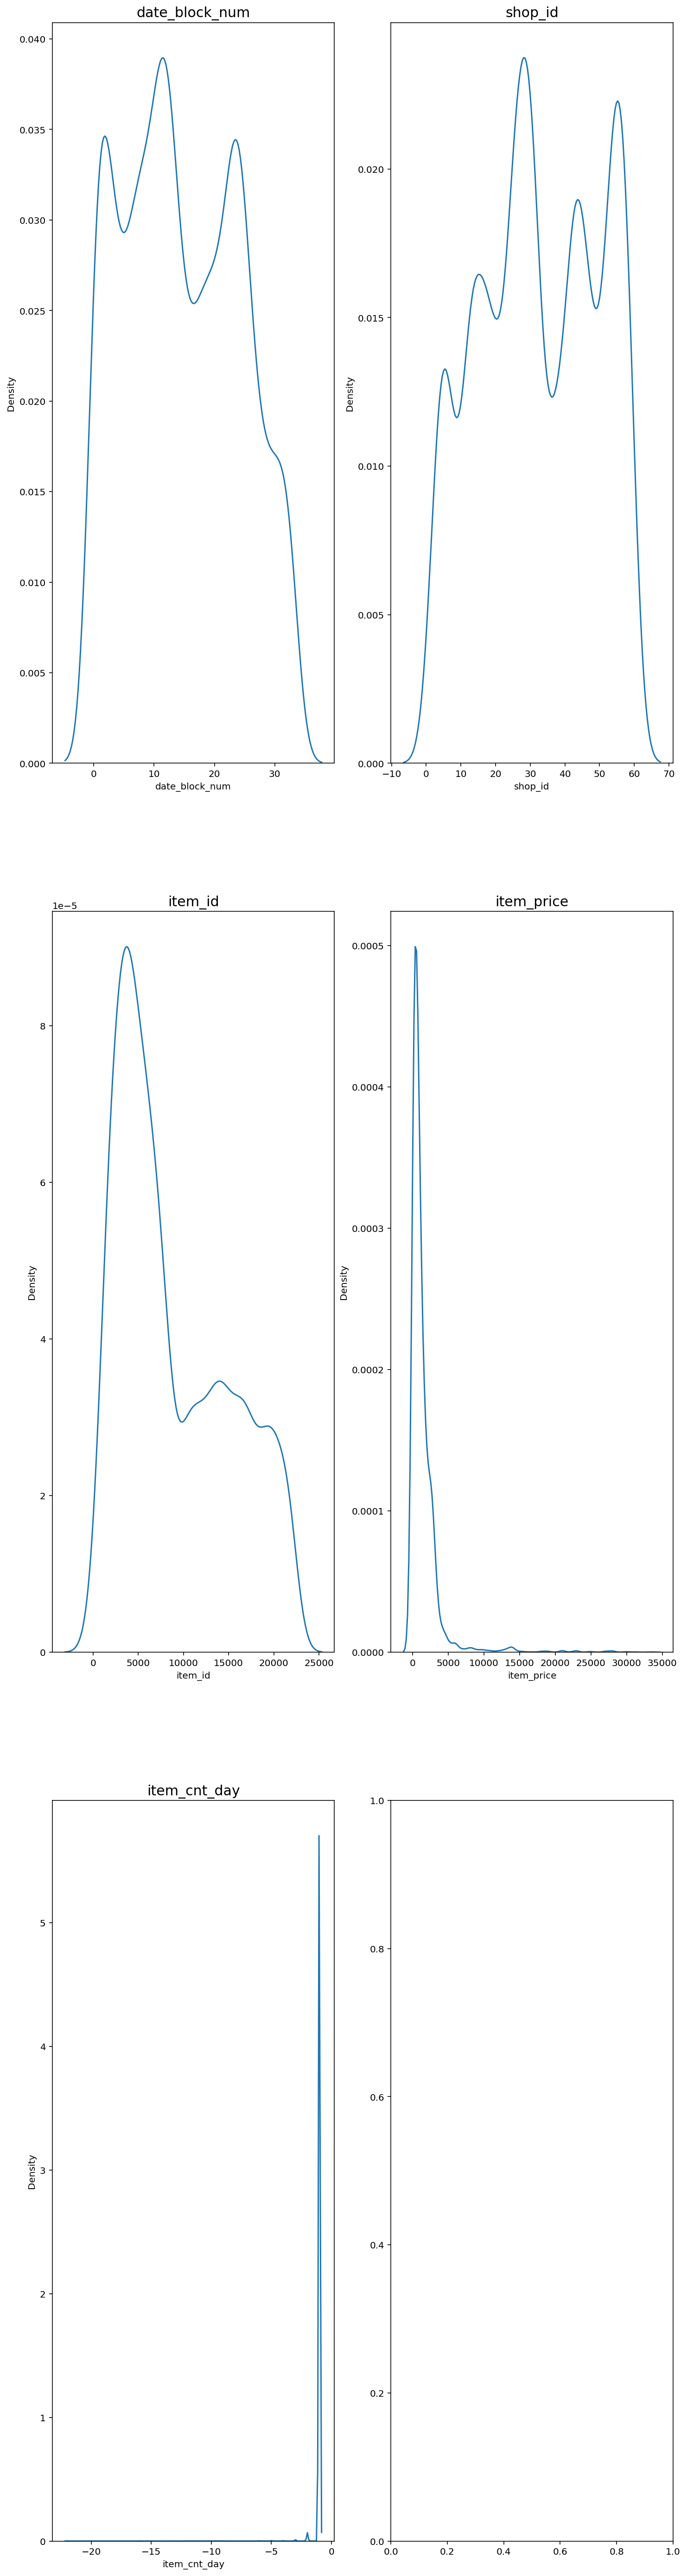

In [9]:
fig, ax = plt.subplots(3,2,figsize = (12,50))
columns = anomal_count.columns
count = 1
for row in range(3) :
    for col in range(2) :
        sns.kdeplot(anomal_count[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 6 :
            break

Ïù¥ÏÉÅÍ∞íÏù¥ ÎÇòÏò® Í∞úÏ≤¥Îì§ÏóêÏÑú Ïñ¥Îñ§ Ìå®ÌÑ¥ÏùÑ Ï∞æÏùÑ Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå Ìï¥ÏÑú KDE Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ Î∂ÑÌè¨Î•º ÏïåÏïÑÎ≥¥ÏïòÎã§. Ïò§ÏßÅ Î∂ÑÌè¨Ïùò Î™®ÏñëÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥ÏÑú Í∑∏Î¶∞ Í≤ÉÏúºÎ°ú, Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ Î≥¥Î†§Í≥† Ìïú Í≤ÉÏù¥ ÏïÑÎãàÎã§. Ïñ¥Îäê Î≥ÄÏàòÏóê ÏùòÌï¥ Ïù¥ÏÉÅÍ∞íÎì§Ïù¥ Î™®Ïó¨ÏûàÎäî ÌòïÌÉúÍ∞Ä Í∑∏Î†§ÏßÄÎ©¥ Ìï¥Îãπ Ïù¥ÏÉÅÍ∞íÏùÑ Ïñ¥ÎñªÍ≤å Îã§Î£∞Ïàò ÏûàÏùÑ ÏßÄ Í≤∞Ï†ï Í∞ÄÎä•Ìï¥ Î≥¥Ïó¨ÏÑú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í≤å ÎêòÏóàÎã§. 
1. date_block_num
ÌäπÏ†ï Îã¨Ïóê Îî∞Îùº Ïù¥ÏÉÅÏπòÍ∞Ä Î™®Ïó¨ÏûàÎäî Íµ¨Í∞ÑÏù¥ ÏÑ∏ Íµ¨Í∞Ñ Ï†ïÎèÑ ÎêòÎäî Í±∏Î°ú Î≥¥Ïù∏Îã§. => frequencyÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú Î≥º Í≤É
2. shop_id
ÌäπÏ†ï shopÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏù¥ Í∏∞Î°ùÎêú Î™®ÏñëÏù∏Îç∞, Îã§ÏÑØ Íµ∞Îç∞Í∞Ä ÌäπÌûà Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏù¥ Î∞úÏÉùÌïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. => frequencyÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú Î≥º Í≤É
3. item_id
ÌäπÏ†ï itemÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏù¥ Î∞úÏÉùÌñàÎÇòÎ≥¥Îã§. ÌÅ∞ Î¥âÏö∞Î¶¨ ÌïòÎÇòÍ∞Ä ÏÉùÍ≤®ÏûàÎã§.=> frequencyÎ•º Í≥ÑÏÇ∞Ìï¥ÏÑú Î≥º Í≤É
4. item_price 
Ïù¥ Î∂ÄÎ∂ÑÏùÄ Î™®Ïó¨ÏûàÏñ¥ÏÑú Ï†úÎåÄÎ°ú Î∂ÑÏÑùÏù¥ Î∂àÍ∞ÄÎä•ÌïúÎç∞, Ï†úÎåÄÎ°ú Î≥¥Î†§Î©¥ 5000Ïù¥ÌïòÏùò Í∞ÄÍ≤©ÏùÑ Í∞ÄÏßÑ Í≤ΩÏö∞Î°ú Îã§Ïãú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§ÏÑú Î¥êÏïºÌï† Í≤É Í∞ôÎã§. => 5000Ïù¥ÌïòÏùò Í∞ÄÍ≤©ÏùÑ Í∞ÄÏßÑ ÏïÑÏù¥ÌÖúÏóê ÎåÄÌï¥ Îã§Ïãú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
5. item_cnt_day
Ïù¥ÏÉÅÏπòÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ -1Ïù¥ ÎÇòÏò®Îã§. Ï†úÏùº ÎÇÆÏùÄ Í∞íÏùÄ -22Ïù∏Îç∞ ÎπàÎèÑÏàòÍ∞Ä Í∑∏Î†áÍ≤å ÎßéÏßÄ ÏïäÎã§.

Î®ºÏ†Ä 1Î≤à, 2Î≤à, 3Î≤àÏùÑ Ìï¥Î≥¥Ïûê. 

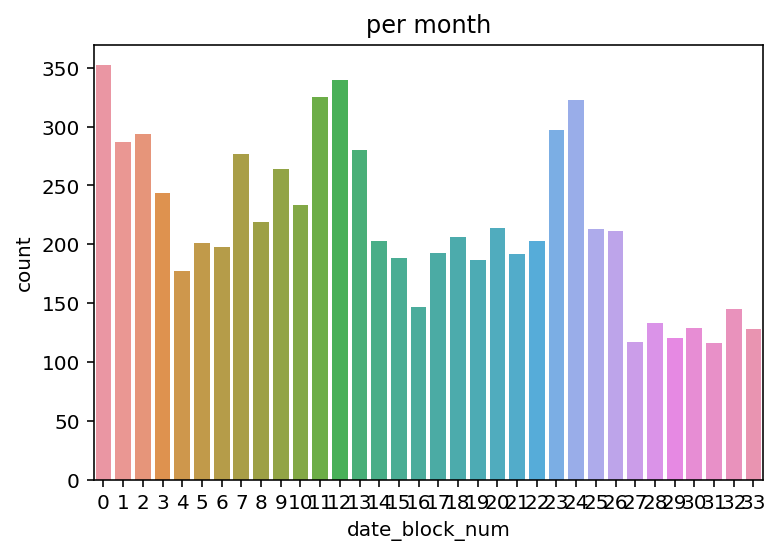

In [61]:
sns.countplot(x="date_block_num", data=anomal_count)
plt.title("per month")
plt.show()

Ï≤´Î≤àÏß∏Ïùò Í≤ΩÏö∞ Ï≤´Î≤àÏß∏ Îã¨, 12Î≤àÏß∏ Îã¨, 24Î≤àÏß∏ Îã¨Ïóê Ïù¥ÏÉÅÌïú Í∞íÏù¥ ÎßéÏù¥ Îì§Ïñ¥ÏôîÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. 

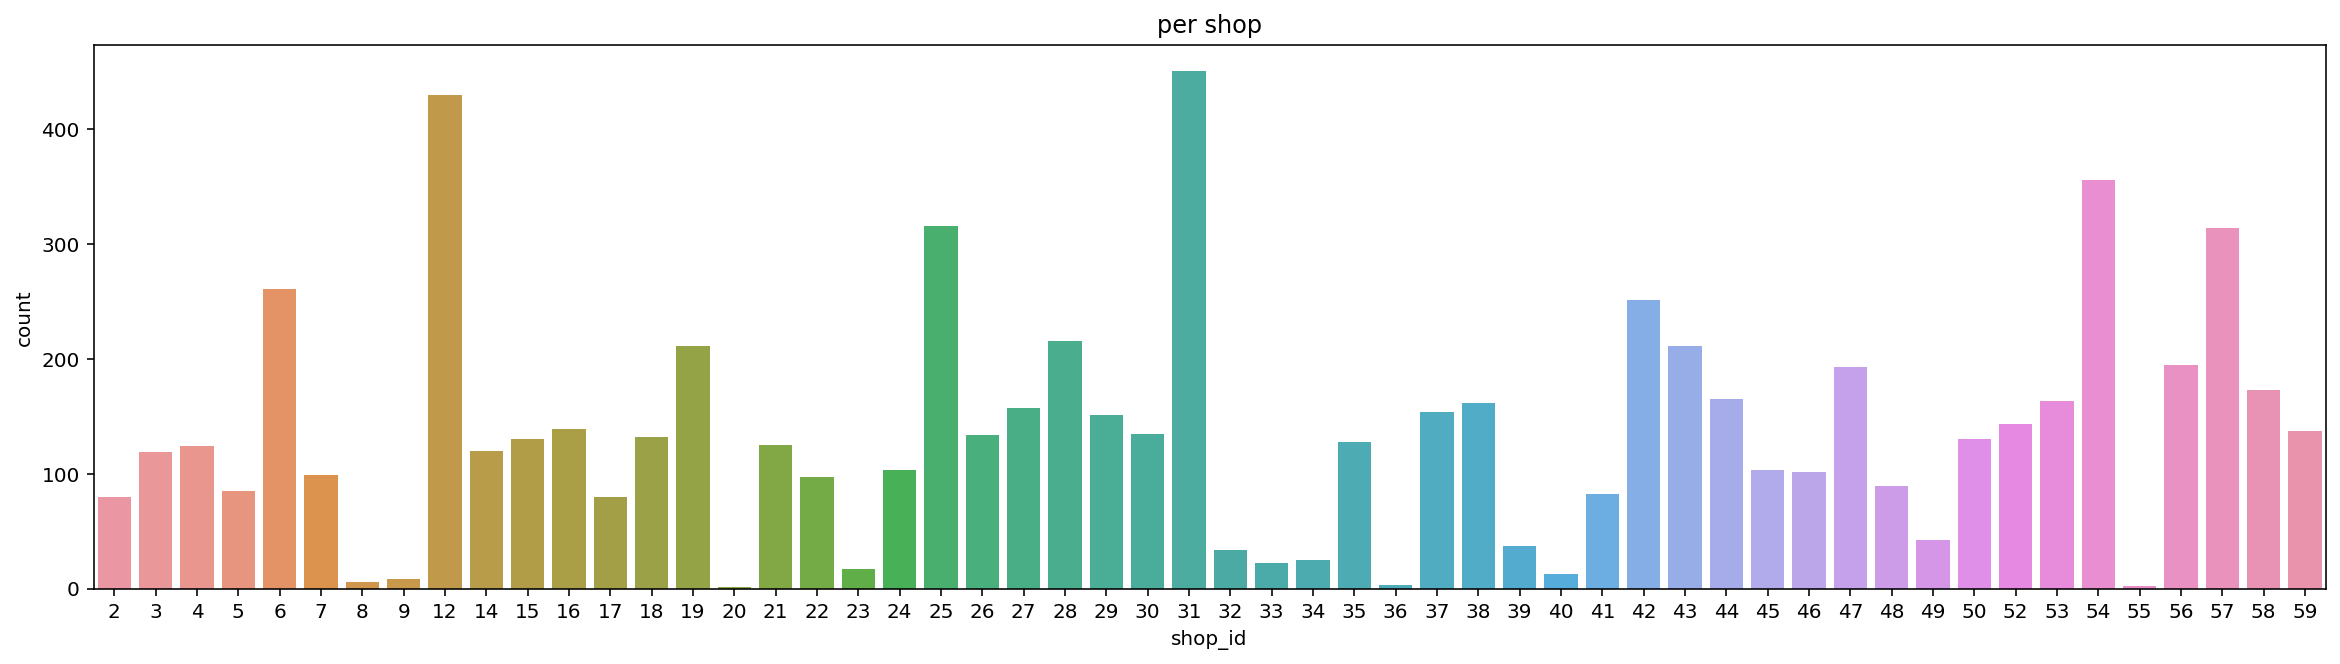

In [62]:
plt.subplots(figsize=(20, 5))
sns.countplot(x="shop_id", data = anomal_count)
plt.title("per shop")
plt.show()

12Î≤àÏÉµ, 31Î≤àÏÉµ, 54Î≤à, 57Î≤àÏÉµÏóêÏÑú Ïù¥ÏÉÅÌïú Í∞íÏù¥ ÎßéÏù¥ ÎÇòÏôîÎã§. Í∞ÄÍ≤å ÏÉÅÍ¥ÄÏóÜÏù¥ Ïù¥ÏÉÅÍ∞íÏù¥ Í≥†Î•¥Í≤å Îì±Ïû•ÌñàÎã§Î©¥ Î∂ÄÌò∏Í∞Ä ÏùåÏàòÏù∏ Í∞íÏù¥ `ÏûòÎ™ª ÏûÖÎ†•Îêú` Í∞íÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎäîÎç∞, ÌäπÏ†ï ÏÉµÏóêÏÑú ÎßéÏù¥ Î∞úÏÉùÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïñ¥Îñ§ ÌäπÏ†ï ÌñâÎèôÏùò Í≤∞Í≥ºÎ°ú Î≥¥Ïù∏Îã§.  

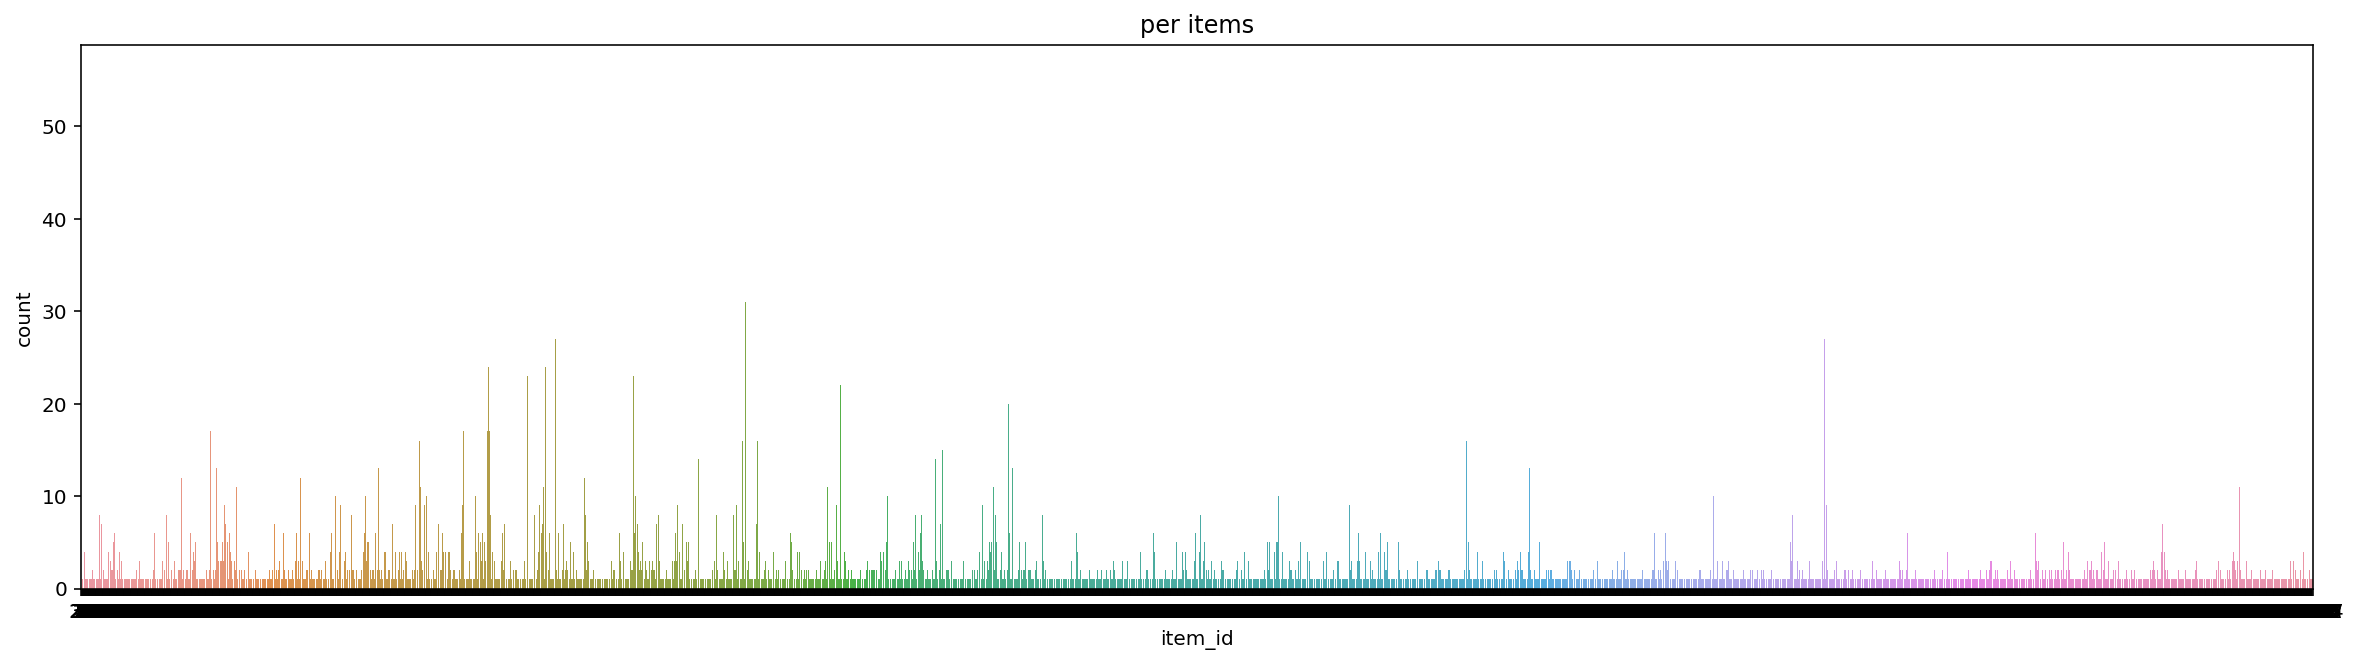

In [63]:
plt.subplots(figsize=(20, 5))
sns.countplot(x="item_id", data = anomal_count)
plt.title("per items")
plt.show()

In [10]:
print(anomal_item.describe())
anomal_item_over_75 = anomal_item[anomal_item.apply(lambda x : x['date'] > 2, axis = 1)]

              date  date_block_num      shop_id   item_price  item_cnt_day
count  3511.000000     3511.000000  3511.000000  3511.000000   3511.000000
mean      2.095130        2.095130     2.095130     2.095130      2.095130
std       2.780899        2.780899     2.780899     2.780899      2.780899
min       1.000000        1.000000     1.000000     1.000000      1.000000
25%       1.000000        1.000000     1.000000     1.000000      1.000000
50%       1.000000        1.000000     1.000000     1.000000      1.000000
75%       2.000000        2.000000     2.000000     2.000000      2.000000
max      56.000000       56.000000    56.000000    56.000000     56.000000


Ïù¥Î†áÍ≤å 'ÌåêÎß§Îüâ'Ïóê ÎåÄÌïú 'ÎßàÏù¥ÎÑàÏä§'Î°ú Ïù¥ÏÉÅÏπòÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§Ïùò Î∂ÑÏÑùÏùÑ Ìï¥Î≥¥ÏïòÎã§. Í∑∏Îü∞Îç∞ Ï§ëÎ≥µÏ†ÅÏúºÎ°ú Ïù¥ÏÉÅÏπòÍ∞Ä Îì§Ïñ¥Ïò§Îäî ÏïÑÏù¥ÎîîÎäî Îî∞Î°ú Î∂ÑÎ•òÌï† ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥Ïù∏Îã§. ÏÉÅÏúÑ 75ÌçºÏÑºÌä∏Ïùò Í∞íÏùÑ Î™®ÏïÑÏÑú ÌôïÏù∏Ìï¥Î≥¥Îãà 4Î≤à Ïù¥ÏÉÅ ÎßàÏù¥ÎÑàÏä§Í∞íÏùÑ Í∞ÄÏßÑ ÏïÑÏù¥ÎîîÎì§ÏùÑ Îî∞Î°ú ÎΩëÏïÑÏÑú ÌõÑÏóê Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóê ÌôúÏö©Ìï† ÏòàÏ†ïÏù¥Îã§. 

In [11]:
anomal_item_id_list = anomal_item[anomal_item.apply(lambda x : x['date'] > 3, axis = 1)]
print(anomal_item_id_list)
#anomal_item_id_list = anomal_item_id_list['item_id']
print(anomal_item_id_list.describe())
anomal_item_id_list = anomal_item_id_list.index
anomal_item_id_list = anomal_item_id_list.drop_duplicates()

         date  date_block_num  shop_id  item_price  item_cnt_day
item_id                                                         
2331       56              56       56          56            56
3734       41              41       41          41            41
1915       32              32       32          32            32
5672       31              31       31          31            31
16787      27              27       27          27            27
...       ...             ...      ...         ...           ...
11497       4               4        4           4             4
18168       4               4        4           4             4
3738        4               4        4           4             4
18344       4               4        4           4             4
7806        4               4        4           4             4

[422 rows x 5 columns]
             date  date_block_num     shop_id  item_price  item_cnt_day
count  422.000000      422.000000  422.000000  422.000000  

ÏùºÎã® ÎßàÏù¥ÎÑàÏä§Î°ú ÎÇòÏò® Í∞íÏóê ÎåÄÌï¥ÏÑú Ïù¥Ï†ïÎèÑ Î∂ÑÌè¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÏÑùÏùÑ Í∑∏ÎåÄÎ°ú ÏßÑÌñâÌï† ÏòàÏ†ïÏù¥Îã§. 

In [12]:
train_data = pd.DataFrame(train_data_origin)
#train_data['item_cnt_day'] = train_data['item_cnt_day'].apply(lambda x : abs(x))
#print(len(train_data[train_data['item_cnt_day'].apply(lambda x : x < 0)]))

ÏùºÎã® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú ÏïÑÎ¨¥Í≤ÉÎèÑ Î™®Î•∏Îã§Í≥† ÏπòÍ≥† Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î∂ÄÌÑ∞ ÏïåÏïÑÎ≥¥Ïûê. Fundamentals 17Î≤à ÎÖ∏ÎìúÏùò Anomaly DetectionÏóê ÎÇòÏò® ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§. Ïù¥Î•º ÌÜµÌï¥ÏÑú outlierÏôÄ novelitiesÎ•º Íµ¨Î∂ÑÌïòÎ†§Í≥† ÌïúÎã§. 
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ ÌååÏïÖÌïòÍ∏∞Ïóê ÏïûÏÑú, Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ∏∞ ÏúÑÌï¥ Ïó¨Îü¨ Í∏∞Ï§ÄÏùÑ ÎëêÏñ¥ Î≤îÏ£ºÎ°ú Î¨∂Ïñ¥ Î∂ÑÏÑùÌïòÎ†§Í≥† ÌïúÎã§. 
1. Í∞Å ÏïÑÏù¥ÌÖúÎ≥Ñ ÌåêÎß§ Ï∂îÏù¥
    - Ìï¥Îãπ ÏïÑÏù¥ÌÖúÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌåêÎß§ ÌùêÎ¶ÑÏù¥ Ïñ¥ÎñªÍ≤å ÎêòÎäîÏßÄ ÏïåÏïÑÎ≥¥Î†§Í≥† ÌïúÎã§.
2. Í∞Å ÎÖÑÎèÑÎ≥Ñ ÌåêÎß§ Ï∂îÏù¥ 
    - ÏÇ¨Ïã§ 2015ÎÖÑÏùÄ Î©îÎ•¥Ïä§Í∞Ä Ïú†ÌñâÌñàÎçò ÏãúÏ†àÏù¥Îã§. Îü¨ÏãúÏïÑ ÏÇ¨ÎûåÎì§Ïù¥ Í≥µÍ≥µÎ≥¥Í±¥ÏùÑ Ïûò ÏßÄÏº∞ÏùÑ ÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå ÌåêÎß§ÌíàÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ÏôÄ ÌïòÎìúÏõ®Ïñ¥ÏôÄ Í¥ÄÎ†®Îêú Ï†úÌíàÎì§Ïù¥Îã§. Ïù¥Ïóê `ÎÖÑÎèÑÏôÄ ÌåêÎß§ Ï∂îÏù¥Ïùò Í¥ÄÎ†®ÏÑ±`Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ Ï¶ùÎ™ÖÌïòÎ†§Í≥† ÌïúÎã§.  

# Í∞Å ÏïÑÏù¥ÌÖúÎ≥Ñ ÌåêÎß§ Ï∂îÏù¥
Î®ºÏ†Ä ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º idÏóê ÏùòÌï¥ ÌïòÎÇòÎ°ú Î¨∂ÎäîÎã§.Îã® Ï†úÏùº ÎßéÏù¥ ÌåîÎ¶∞ ÏÉÅÏúÑ nÍ∞úÏùò Î¨ºÌíàÏóê ÎåÄÌï¥ÏÑú Ïù¥ÏÉÅÏπòÎ•º ÏÇ¥Ìé¥Î≥º ÏòàÏ†ïÏù¥Îã§. Ïù¥Îì§ÏùÑ ÎåÄÌëúÍ∞íÏúºÎ°ú ÏÇºÏïÑÏÑú, ÌåêÎß§ÎüâÍ≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî Ï∞®ÏõêÏùÑ Ï∞æÏúºÎ†§Í≥† ÌïúÎã§.

In [13]:
train_data['date'] = pd.to_datetime(train_data["date"])
train_data = train_data.sort_values(by = ['date'])
items = train_data.groupby(['item_id'])['item_cnt_day'].sum().sort_values(ascending=False)
print(items.head())
print(items.describe())

item_id
20949    187642.0
2808      17245.0
3732      16642.0
17717     15830.0
5822      14515.0
Name: item_cnt_day, dtype: float64
count     21807.00000
mean        167.29518
std        1366.22019
min         -11.00000
25%           7.00000
50%          33.00000
75%         124.00000
max      187642.00000
Name: item_cnt_day, dtype: float64


In [14]:
train_data_with_minus = pd.DataFrame(train_data_origin)
print(train_data_with_minus['item_cnt_day'].describe())

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64


In [15]:
items_cnt_over_mean = items[items.apply(lambda x : x > 168.0)].index
print(items_cnt_over_mean)


Int64Index([20949,  2808,  3732, 17717,  5822,  3734,  6675,  3731,  1855,
            16787,
            ...
             3269,  2484,  3822,  9468,  5948, 20313, 18388, 17620,  8083,
            13444],
           dtype='int64', name='item_id', length=4373)


Í∑∏ÎûòÌîÑÎ•º ÌïúÎ≤àÏóê Í∑∏Î†§Î≥¥Ïûê! Ïó≠ÎåÄ Ïûò ÌåîÎ¶∞ Î¨ºÌíà 10ÏúÑÍπåÏßÄÏùò Î¨ºÍ±¥Îì§Ïùò ÏãúÍ∞Ñ Ï∂îÏù¥Î•º Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î†§Î≥¥Ïûê. 

In [16]:
fig, ax = plt.subplots(5,2,figsize = (12,50))

#items_cnt_over_mean
count = 0
for row in range(5) :
    for col in range(2) :
        item_record = train_data[train_data.apply(lambda x : x['item_id'] == items_cnt_over_mean[count] , axis = 1)]
        item_for_graph = item_record.groupby(['date']).sum(['item_cnt_day'])
        #print(item_for_graph)
        ax[row,col].plot(item_for_graph.index, item_for_graph['item_cnt_day'])
        ax[row,col].set_title(items_cnt_over_mean[count])
        #ax[row][col].set_title(items_cnt_over_mean[count], fontsize=15)
        count += 1
        if count == 10 :
            break

Í∑∏ÎûòÌîÑÎäî ÌÅ¨Í≤å Îëê Î∂ÄÎ•òÎ°ú ÎÇòÎàÑÏñ¥ÏßÑÎã§. Ïñ¥Îñ§ Î¨ºÌíàÏùÄ ÏïûÎ∂ÄÎ∂Ñ Í∏∞Í∞ÑÏùò ÌåêÎß§ÎüâÏù¥ ÎßéÏïÑÎ≥¥Ïù¥Í≥†, 
Ïñ¥Îñ§ Î¨ºÌíàÏùÄ Îí∑Î∂ÄÎ∂ÑÏùò Ïñ¥Îäê Í∏∞Í∞ÑÏùò ÌåêÎß§ÎüâÏù¥ ÎßéÏïÑÎ≥¥Ïù∏Îã§. Í∑∏ÎûòÏÑú Ï†ÄÎ†áÍ≤å Í∑∏ÎûòÌîÑÍ∞Ä ÎÜíÍ≤å ÏπòÏÜüÎäî ÎÇ†Îì§Ïù¥ Í≤πÏπòÎÇò Ïã∂Ïñ¥ `Ï¥ù ÌåêÎß§Îüâ ÏàúÏúÑ 30ÏúÑ Ï†úÌíà`Ïóê ÎåÄÌï¥ Ïñ¥Îäê ÎÇ†ÏßúÏóê ÏµúÍ≥† ÌåêÎß§ÎüâÏùÑ Ï∞çÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî ÏûëÏóÖÏùÑ Ìï¥Î≥º Í≤ÉÏù¥Îã§. 

In [17]:
special_days = {}
count = 0
for i in items_cnt_over_mean : 
    #print(i)
    item_record = train_data[train_data.apply(lambda x : x['item_id'] == i , axis = 1)]
    item_record = item_record.groupby(['date']).sum(['item_cnt_day'])
    special_day = item_record['item_cnt_day'].idxmax()
    if special_day in special_days :
        special_days[special_day] += 1
    else :
        special_days[special_day] = 1
    count += 1
    if count == 30 : 
        break

In [18]:
print(special_days)

{Timestamp('2015-01-15 00:00:00'): 1, Timestamp('2013-07-06 00:00:00'): 1, Timestamp('2013-09-17 00:00:00'): 2, Timestamp('2014-12-27 00:00:00'): 2, Timestamp('2013-11-29 00:00:00'): 4, Timestamp('2015-04-14 00:00:00'): 1, Timestamp('2013-10-29 00:00:00'): 1, Timestamp('2013-06-14 00:00:00'): 1, Timestamp('2013-12-14 00:00:00'): 1, Timestamp('2013-09-26 00:00:00'): 1, Timestamp('2013-02-21 00:00:00'): 1, Timestamp('2013-02-01 00:00:00'): 3, Timestamp('2013-12-30 00:00:00'): 3, Timestamp('2013-12-03 00:00:00'): 2, Timestamp('2014-04-15 00:00:00'): 1, Timestamp('2013-08-24 00:00:00'): 1, Timestamp('2015-10-28 00:00:00'): 1, Timestamp('2014-12-31 00:00:00'): 1, Timestamp('2014-11-18 00:00:00'): 1, Timestamp('2014-07-30 00:00:00'): 1, Timestamp('2015-05-19 00:00:00'): 1, Timestamp('2014-12-30 00:00:00'): 1, Timestamp('2014-03-09 00:00:00'): 1, Timestamp('2013-05-07 00:00:00'): 1, Timestamp('2013-04-10 00:00:00'): 1, Timestamp('2013-06-10 00:00:00'): 1, Timestamp('2014-03-21 00:00:00'): 1, 

In [19]:
# ÏÇ¨Ï†ÑÏùÑ keyÏóê Îî∞ÎùºÏÑú Ï†ïÎ†¨ÌïòÍ∏∞
import collections
od = collections.OrderedDict(sorted(special_days.items()))

In [20]:
print(od)

OrderedDict([(Timestamp('2013-02-01 00:00:00'), 3), (Timestamp('2013-02-21 00:00:00'), 1), (Timestamp('2013-04-10 00:00:00'), 1), (Timestamp('2013-05-07 00:00:00'), 1), (Timestamp('2013-05-11 00:00:00'), 1), (Timestamp('2013-05-17 00:00:00'), 1), (Timestamp('2013-06-10 00:00:00'), 1), (Timestamp('2013-06-14 00:00:00'), 1), (Timestamp('2013-07-06 00:00:00'), 1), (Timestamp('2013-08-24 00:00:00'), 1), (Timestamp('2013-09-17 00:00:00'), 2), (Timestamp('2013-09-26 00:00:00'), 1), (Timestamp('2013-10-29 00:00:00'), 1), (Timestamp('2013-11-29 00:00:00'), 4), (Timestamp('2013-12-03 00:00:00'), 2), (Timestamp('2013-12-14 00:00:00'), 1), (Timestamp('2013-12-22 00:00:00'), 1), (Timestamp('2013-12-30 00:00:00'), 3), (Timestamp('2014-03-09 00:00:00'), 1), (Timestamp('2014-03-21 00:00:00'), 1), (Timestamp('2014-04-15 00:00:00'), 1), (Timestamp('2014-07-30 00:00:00'), 1), (Timestamp('2014-11-18 00:00:00'), 1), (Timestamp('2014-12-27 00:00:00'), 2), (Timestamp('2014-12-30 00:00:00'), 1), (Timestamp('

ÏãúÍ∞ÑÏù¥ ÏûàÏóàÎã§Î©¥ Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î†∏ÏùÑ Í±¥Îç∞, Í∑∏Î†áÏßÄ Î™ªÌï¥ÏÑú Î™áÏõîÏóê ÏµúÍ≥†Ï†êÏù¥ Î∞úÏÉùÌñàÎäîÏßÄÎ•º ÎààÏúºÎ°ú ÌõëÏóàÍ≥†, Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï∂îÎ°†ÏùÑ Ìï† Ïàò ÏûàÏóàÎã§.
1. 11Ïõî Îßê, 12Ïõî ÎßêÏùò ÎÇ†ÏßúÍ∞Ä ÏûàÎã§.
2. 2Ïõî, 3ÏõîÏùò ÎÇ†ÏßúÍ∞Ä ÏûàÎã§. 
Ïù¥ Îëê Í∏∞Í∞ÑÎèôÏïà Ïñ¥Îñ§ Ïù¥Î≤§Ìä∏Í∞Ä Î∞úÏÉùÌï¥ÏÑú ÌåêÎß§ÎüâÏù¥ Îäî Í≤ÉÏù¥ ÏïÑÎãêÍπå ÌïòÎäî Ï∂îÏ∏°ÏùÑ Ìï† Ïàò ÏûàÏóàÎã§. Í∑∏ Ï§ëÏóêÏÑú 1Î≤àÏù¥ ÌäπÌûà ÎèÑÎìúÎùºÏßÄÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïó¨ÏÑú 1Î≤àÏùò Íµ¨Í∞ÑÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞ Ï§ë 12Ïõî 25ÏùºÎ∂ÄÌÑ∞ 1Ïõî 7ÏùºÍπåÏßÄ Î∞úÏÉùÌïú Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏ÏãúÌÇ§Í≥† ÌïôÏäµÌïòÎ†§Í≥† ÌïúÎã§. Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï† Îç∞Ïù¥ÌÑ∞Îäî 11Ïõî Îç∞Ïù¥ÌÑ∞Ïù¥Í≥†, Í∑πÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Ïù¥Í∏∞ ÏßÅÏ†ÑÏùò Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. ÎÇòÏ§ëÏóê Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Ï†úÏô∏Ìï† ÏòàÏ†ïÏù¥Îã§. 

In [4]:
print(data.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')


# item ÌôïÏù∏ÌïòÍ∏∞

ÏïÑÏù¥ÌÖú ÌíàÎ™ÖÏùÑ ÌôïÏù∏ÌñàÎçîÎãà Îü¨ÏãúÏïÑ Ï†úÌíàÏûÑÏùÑ Ïïå Ïàò ÏûàÏóàÎã§.  
Î≤àÏó≠ÏùÑ ÌÜµÌï¥ Ïñ¥Îñ§ Î¨ºÌíàÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Ïù∏ÏßÄ ÏïåÎ©¥ Îçî ÌäπÏßïÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌï† Ïàò ÎèÑ ÏûàÍ≤†ÏßÄÎßå,  
Ïù¥Î≤àÏóêÎäî ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ ÏßöÍ≥† ÎÑòÏñ¥Í∞ÄÏßÄ ÏïäÏïòÎã§.  

In [5]:
# ÌôïÏù∏ÌïòÍ∏∞
items = pd.read_csv('items.csv')
items.head(10)

item_name  item_id  \
0          ! –í–û –í–õ–ê–°–¢–ò –ù–ê–í–ê–ñ–î–ï–ù–ò–Ø (–ü–õ–ê–°–¢.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***–í –õ–£–ß–ê–• –°–õ–ê–í–´   (UNV)                    D        2   
3    ***–ì–û–õ–£–ë–ê–Ø –í–û–õ–ù–ê  (Univ)                      D        3   
4        ***–ö–û–†–û–ë–ö–ê (–°–¢–ï–ö–õ–û)                       D        4   
5  ***–ù–û–í–´–ï –ê–ú–ï–†–ò–ö–ê–ù–°–ö–ò–ï –ì–†–ê–§–§–ò–¢–ò  (UNI)         ...        5   
6           ***–£–î–ê–† –ü–û –í–û–†–û–¢–ê–ú (UNI)               D        6   
7         ***–£–î–ê–† –ü–û –í–û–†–û–¢–ê–ú-2 (UNI)               D        7   
8           ***–ß–ê–ô –° –ú–£–°–°–û–õ–ò–ù–ò                     D        8   
9      ***–®–£–ì–ê–†–õ–≠–ù–î–°–ö–ò–ô –≠–ö–°–ü–†–ï–°–° (UNI)             D        9   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
5                40  
6                40  
7                40  
8                40  
9                40

# test ÏôÄ dataÏôÄÏùò Í¥ÄÍ≥ÑÎì§

In [6]:
sample = pd.read_csv('sample_submission.csv')
print(len(sample)) 
sample

214200


ID  item_cnt_month
0            0             0.5
1            1             0.5
2            2             0.5
3            3             0.5
4            4             0.5
...        ...             ...
214195  214195             0.5
214196  214196             0.5
214197  214197             0.5
214198  214198             0.5
214199  214199             0.5

[214200 rows x 2 columns]

In [7]:
test = pd.read_csv('test.csv')
print(len(test)) # test Í∞úÏàòÍ∞Ä Î∞îÎ°ú Ï∂îÏ∏°Ìï¥ÏïºÌïòÎäî ÏïÑÏù¥ÌÖú Í∞úÏàò
test

214200


ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]

> len(sample) == len(test)  
ÎèôÏùºÌï® ÌôïÏù∏

In [8]:
test_ndarray = test.values
test_ndarray

array([[     0,      5,   5037],
       [     1,      5,   5320],
       [     2,      5,   5233],
       ...,
       [214197,     45,  15757],
       [214198,     45,  19648],
       [214199,     45,    969]])

In [9]:
test_item_id = test_ndarray[:, 2]
test_item_id

array([ 5037,  5320,  5233, ..., 15757, 19648,   969])

In [10]:
test_item_id_uniq = np.unique(test_item_id)
print(len(test_item_id_uniq))
test_item_id_uniq

5100


array([   30,    31,    32, ..., 22164, 22166, 22167])

In [11]:
data_ndarray = data.values
data_ndarray

array([['02.01.2013', 0, 59, 22154, 999.0, 1.0],
       ['03.01.2013', 0, 25, 2552, 899.0, 1.0],
       ['05.01.2013', 0, 25, 2552, 899.0, -1.0],
       ...,
       ['14.10.2015', 33, 25, 7459, 349.0, 1.0],
       ['22.10.2015', 33, 25, 7440, 299.0, 1.0],
       ['03.10.2015', 33, 25, 7460, 299.0, 1.0]], dtype=object)

In [12]:
# item_idÎßå arrayÎ°ú
data_item_id = data_ndarray[:, 3]
print(len(data_item_id))
data_item_id

2935849


array([22154, 2552, 2552, ..., 7459, 7440, 7460], dtype=object)

In [13]:
item_id_uniq = np.unique(data_item_id)
print(len(item_id_uniq))
item_id_uniq

21807


array([0, 1, 2, ..., 22167, 22168, 22169], dtype=object)

In [14]:
test_only = set(test_item_id_uniq) - set(item_id_uniq)
print(len(test_only))
# test_only

363


# ÏõîÎ≥ÑÎ°ú ÌåêÎß§Îüâ Î∂ÑÏÑùÌïòÍ∏∞

# 13ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà

In [15]:
data

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

In [16]:
num_item_id = data.loc[:, ['date_block_num', 'item_id']]
num_item_id

date_block_num  item_id
0                     0    22154
1                     0     2552
2                     0     2552
3                     0     2554
4                     0     2555
...                 ...      ...
2935844              33     7409
2935845              33     7460
2935846              33     7459
2935847              33     7440
2935848              33     7460

[2935849 rows x 2 columns]

## 13ÎÖÑ 10Ïõî

In [17]:
# 13ÎÖÑ 10Ïõî
tt_oct = num_item_id[num_item_id['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9])]
tt_oct

date_block_num  item_id
0                     0    22154
1                     0     2552
2                     0     2552
3                     0     2554
4                     0     2555
...                 ...      ...
1027575               9    11812
1027576               9    11811
1027577               9    11623
1027578               9     5680
1027579               9     5682

[1027580 rows x 2 columns]

In [18]:
# 13 oct -> array
tt_oct_array = tt_oct.values
tt_oct_array

array([[    0, 22154],
       [    0,  2552],
       [    0,  2552],
       ...,
       [    9, 11623],
       [    9,  5680],
       [    9,  5682]])

In [19]:
# 13 oct arrayÏóêÏÑú Ï∂îÏ∂ú 
tt_oct_item = tt_oct_array[:, 1]
print(len(tt_oct_item))
tt_oct_item

1027580


array([22154,  2552,  2552, ..., 11623,  5680,  5682])

In [20]:
# Ï§ëÎ≥µÏ†úÍ±∞
tt_oct_item_uniq = np.unique(tt_oct_item)
print(len(tt_oct_item_uniq))
tt_oct_item_uniq

13946


array([   12,    19,    27, ..., 22166, 22167, 22168])

13ÎÖÑ 10ÏõîÍπåÏßÄ ÌåêÎß§Îêú Ï†úÌíàÏùò Ï¢ÖÎ•ò Í∞úÏàòÎäî 13946Í∞úÏù¥Îã§. 

## 13ÎÖÑ 11Ïõî

In [21]:
# 13ÎÖÑ 11Ïõî
tt_nov = num_item_id[num_item_id['date_block_num'] == 10]
tt_nov

date_block_num  item_id
1027580              10     4420
1027581              10    10033
1027582              10    10051
1027583              10    10051
1027584              10    10051
...                 ...      ...
1124311              10     3734
1124312              10     3734
1124313              10     3743
1124314              10     3743
1124315              10     3734

[96736 rows x 2 columns]

In [22]:
# 13 nov -> array
tt_nov_array = tt_nov.values
tt_nov_array

array([[   10,  4420],
       [   10, 10033],
       [   10, 10051],
       ...,
       [   10,  3743],
       [   10,  3743],
       [   10,  3734]])

In [23]:
# 13 nov arrayÏóêÏÑú Ï∂îÏ∂ú 
tt_nov_item = tt_nov_array[:, 1]
print(len(tt_nov_item))
tt_nov_item

96736


array([ 4420, 10033, 10051, ...,  3743,  3743,  3734])

In [24]:
# Ï§ëÎ≥µÏ†úÍ±∞
tt_nov_item_uniq = np.unique(tt_nov_item)
print(len(tt_nov_item_uniq))
tt_nov_item_uniq

8089


array([   27,    28,    30, ..., 22155, 22166, 22167])

In [25]:
# tt nov only
tt_nov_only = set(tt_nov_item_uniq) - set(tt_oct_item_uniq)
print('13ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà :', len(tt_nov_only))
print(type(tt_nov_only))
# tt_nov_only

13ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà : 489
<class 'set'>


In [26]:
# set -> list
lst_tt_nov_only = list(tt_nov_only)
# lst_tt_nov_only

## 13ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà ÏñºÎßàÏù∏ÏßÄ dictÏù¥ÎÇò dataframeÏúºÎ°ú Í∑∏Î¶¨Í≥† Í∞ÄÍ≤©

In [27]:
# 13ÎÖÑ 11Ïõî
tt_nov_new = data[data['item_id'].isin(lst_tt_nov_only)]
tt_nov_new = tt_nov_new[tt_nov_new['date_block_num'] == 10]
tt_nov_new

date  date_block_num  shop_id  item_id  item_price  \
1027637  30.11.2013              10       28    10297       749.0   
1027690  30.11.2013              10       28    10299      1399.0   
1027713  21.11.2013              10       28     9077       299.0   
1027714  24.11.2013              10       28     9077       299.0   
1027715  30.11.2013              10       28     9077       299.0   
...             ...             ...      ...      ...         ...   
1124068  29.11.2013              10       50     3333      2599.0   
1124125  29.11.2013              10       50     4271      2799.0   
1124196  30.11.2013              10       50     3899       299.0   
1124234  29.11.2013              10       50     4231      2799.0   
1124235  30.11.2013              10       50     4231      2799.0   

         item_cnt_day  
1027637           1.0  
1027690           1.0  
1027713           1.0  
1027714           1.0  
1027715           1.0  
...               ...  
1124068           8.0  
1124125           7.0  
1124196           1.0  
1124234          25.0  
1124235           6.0  

[13760 rows x 6 columns]

In [28]:
len(tt_nov_item) - len(tt_nov_new)

82976

82976Í∞úÎäî Í∏∞Ï°¥ÏóêÎèÑ ÌåîÎçòÍ±∞,  
13760Í∞úÎäî 11Ïõî Ïã†ÏÉÅÌíà

In [29]:
print(tt_nov_new['item_price'].describe())

count    13760.000000
mean      1128.557608
std       1693.105961
min         22.400000
25%        399.000000
50%        699.000000
75%       1399.000000
max      18665.000000
Name: item_price, dtype: float64


13ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíàÏùò Í∞ÄÍ≤© ÌèâÍ∑†ÏùÄ 1128.56 Ïù¥Îã§.

# 14ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà

## 14ÎÖÑ 10ÏõîÍπåÏßÄ ÌåîÎ†∏Îçò ÏÉÅÌíàÎì§

In [30]:
# 14ÎÖÑ 10ÏõîÍπåÏßÄ
ft_oct = num_item_id[num_item_id['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9,10,11,
                                                         12,13,14,15,16,17,18,19,20,21])]
ft_oct

date_block_num  item_id
0                     0    22154
1                     0     2552
2                     0     2552
3                     0     2554
4                     0     2555
...                 ...      ...
2106204              21     7351
2106205              21     7492
2106206              21     7215
2106207              21    12596
2106208              21    18335

[2106209 rows x 2 columns]

In [31]:
# 14 oct -> array
ft_oct_array = ft_oct.values
ft_oct_array

array([[    0, 22154],
       [    0,  2552],
       [    0,  2552],
       ...,
       [   21,  7215],
       [   21, 12596],
       [   21, 18335]])

In [32]:
# 14 oct arrayÏóêÏÑú Ï∂îÏ∂ú 
ft_oct_item = ft_oct_array[:, 1]
print(len(ft_oct_item))
ft_oct_item

2106209


array([22154,  2552,  2552, ...,  7215, 12596, 18335])

In [33]:
# Ï§ëÎ≥µÏ†úÍ±∞
ft_oct_item_uniq = np.unique(ft_oct_item)
print(len(ft_oct_item_uniq))
ft_oct_item_uniq

18115


array([    0,     1,     2, ..., 22167, 22168, 22169])

13ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 14ÎÖÑ 10ÏõîÍπåÏßÄ ÌåîÎ¶∞ ÏÉÅÌíà Ï¢ÖÎ•ò Í∞úÏàòÎäî 18115Í∞ú

## 14ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà

In [34]:
# 14ÎÖÑ 11Ïõî
ft_nov = num_item_id[num_item_id['date_block_num'] == 22]
ft_nov

date_block_num  item_id
2106209              22     3460
2106210              22     4615
2106211              22     4870
2106212              22     4870
2106213              22     4870
...                 ...      ...
2192632              22       59
2192633              22       59
2192634              22       77
2192635              22       32
2192636              22       32

[86428 rows x 2 columns]

In [35]:
# 14 nov -> array
ft_nov_array = ft_nov.values
ft_nov_array

array([[  22, 3460],
       [  22, 4615],
       [  22, 4870],
       ...,
       [  22,   77],
       [  22,   32],
       [  22,   32]])

In [36]:
# 14 nov arrayÏóêÏÑú Ï∂îÏ∂ú 
ft_nov_item = ft_nov_array[:, 1]
print(len(ft_nov_item))
ft_nov_item

86428


array([3460, 4615, 4870, ...,   77,   32,   32])

In [37]:
# Ï§ëÎ≥µÏ†úÍ±∞
ft_nov_item_uniq = np.unique(ft_nov_item)
print(len(ft_nov_item_uniq))
ft_nov_item_uniq

6322


array([    2,    11,    15, ..., 22146, 22166, 22167])

In [38]:
# ft nov only
ft_nov_only = set(ft_nov_item_uniq) - set(ft_oct_item_uniq)
print('14ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà :', len(ft_nov_only))
print(type(ft_nov_only))
# ft_nov_only

14ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà : 460
<class 'set'>


In [39]:
# listÎ°ú ÎßåÎì§Í∏∞ 
lst_ft_nov_only = list(ft_nov_only)
# lst_ft_nov_only

## 14ÎÖÑ 11Ïõî Ïã†ÏÉÅÌíà ÏñºÎßàÏù∏ÏßÄ dictÏù¥ÎÇò dataframeÏúºÎ°ú Í∑∏Î¶¨Í≥† Í∞ÄÍ≤©

In [40]:
# 14ÎÖÑ 11Ïõî
ft_nov_new = data[data['item_id'].isin(lst_ft_nov_only)]
ft_nov_new = ft_nov_new[ft_nov_new['date_block_num'] == 22]
ft_nov_new

date  date_block_num  shop_id  item_id  item_price  \
2106209  19.11.2014              22       37     3460      1299.0   
2106256  21.11.2014              22       33     4334       799.0   
2106257  28.11.2014              22       33     4334       799.0   
2106259  23.11.2014              22       33     4337      2999.0   
2106270  26.11.2014              22       33     4478      2499.0   
...             ...             ...      ...      ...         ...   
2192494  21.11.2014              22       46    21387      1529.0   
2192495  20.11.2014              22       46    21387      1444.0   
2192498  21.11.2014              22       46    21430       799.0   
2192500  28.11.2014              22       46    21976      1349.0   
2192501  22.11.2014              22       46    21976      1349.0   

         item_cnt_day  
2106209           3.0  
2106256           1.0  
2106257           1.0  
2106259           1.0  
2106270           1.0  
...               ...  
2192494           1.0  
2192495           2.0  
2192498           1.0  
2192500           1.0  
2192501           1.0  

[15644 rows x 6 columns]

In [41]:
len(ft_nov_item) - len(ft_nov_new)

70784

70784 Í∏∞Ï°¥ Ï†úÌíà ÌåêÎß§Îüâ  
15644 Ïã†ÏÉÅÌíà 460Í∞úÏóê ÎåÄÌïú ÌåêÎß§Îüâ

In [42]:
print(ft_nov_new['item_price'].describe())

count    15644.000000
mean      2096.400350
std       2606.630176
min         10.000000
25%        699.000000
50%       1619.000000
75%       2999.000000
max      40900.000000
Name: item_price, dtype: float64


In [43]:
print(ft_nov_new['item_price'].describe())

count    15644.000000
mean      2096.400350
std       2606.630176
min         10.000000
25%        699.000000
50%       1619.000000
75%       2999.000000
max      40900.000000
Name: item_price, dtype: float64


Í∞Å ÎÖÑÎèÑÏùò 11Ïõî Ïã†ÏÉÅÌíàÏóê ÎåÄÌïú ÌèâÍ∑† Í∞ÄÍ≤© Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§.

# Ïã†ÏÉÅÌíàÏóê ÎåÄÌïú ÌèâÍ∑†Ï†Å ÌåêÎß§Îüâ

In [44]:
print(tt_nov_new['item_cnt_day'].describe())

count    13760.000000
mean         2.039026
std          3.889715
min         -2.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        126.000000
Name: item_cnt_day, dtype: float64


In [45]:
print(ft_nov_new['item_cnt_day'].describe())

count    15644.000000
mean         2.006328
std          4.250637
min         -1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        167.000000
Name: item_cnt_day, dtype: float64


Îã§ÌñâÌûà ÌåêÎß§ÎüâÏùò ÌèâÍ∑†ÏùÄ 2Í∞úÎ°ú ÎèôÏùº   
ÌïòÏßÄÎßå Ïù¥Î†áÍ≤å Ïã†ÏÉÅÌíàÏùò ÌèâÍ∑† ÌåêÎß§ Í∞úÏàòÎ•º ÌïôÏäµÎã®Í≥ÑÏóêÏÑú Ïñ¥ÎñªÍ≤å Ï†ÅÏö©ÌïòÎäîÏßÄ Î™∞ÎûêÎã§.  
Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú ÌïôÏäµÏãúÌÇ§Îäî Î™®Îç∏Ïóê ÎåÄÌï¥ Îçî Í≥µÎ∂ÄÍ∞Ä ÌïÑÏöîÌï®ÏùÑ ÎäêÍºàÎã§.

# 34Í∞úÏõî ÎèôÏïà ÌåêÎß§Îüâ describe

In [46]:
print(data['item_cnt_day'].describe())

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64


ÏïÑÏù¥ÌÖú Î≥Ñ ÌåêÎß§ ÏàòÎüâÏù¥ -22 Î∂ÄÌÑ∞ 2169Í∞Ä ÌåîÎ¶∞Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÎã§.   
ÏùåÏàòÏù∏ dataÎ•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÍπåÌïòÎã§Í∞Ä Îã§Î•∏ Ï°∞ÏõêÍ≥º Ïù¥ÏïºÍ∏∞ÌïòÎ©¥ÏÑú Î∞òÌíàÏùº ÏàòÎèÑ ÏûàÎã§Îäî ÏùòÍ≤¨ÏùÑ ÏàòÏö©Ìï¥ÏÑú  
Îî∞Î°ú Ï†ÑÏ≤òÎ¶¨ÌïòÏßÄ ÏïäÍ≥† Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌñàÎã§.  

# Ïñ¥Îñ§ ÏïÑÏù¥ÌÖúÏù¥ Ï†úÏùº ÎßéÏù¥ ÌåîÎ†∏ÎäîÏßÄ Í∂ÅÍ∏àÌï¥

In [47]:
# dataframe -> ndarray
data_ndarray = data.values
data_ndarray

array([['02.01.2013', 0, 59, 22154, 999.0, 1.0],
       ['03.01.2013', 0, 25, 2552, 899.0, 1.0],
       ['05.01.2013', 0, 25, 2552, 899.0, -1.0],
       ...,
       ['14.10.2015', 33, 25, 7459, 349.0, 1.0],
       ['22.10.2015', 33, 25, 7440, 299.0, 1.0],
       ['03.10.2015', 33, 25, 7460, 299.0, 1.0]], dtype=object)

In [48]:
org_data = data
del data['date']
del data['date_block_num']
del data['shop_id']
del data['item_cnt_day']

id_and_price = data

In [49]:
id_and_price.head()

item_id  item_price
0    22154      999.00
1     2552      899.00
2     2552      899.00
3     2554     1709.05
4     2555     1099.00

In [50]:
print(id_and_price.groupby(data['item_id']).count().sort_values(['item_price'], ascending=False))

         item_price
item_id            
20949         31340
5822           9408
17717          9067
2808           7479
4181           6853
...             ...
10752             1
10753             1
10799             1
10835             1
22169             1

[21807 rows x 1 columns]


\#20949Í∞Ä ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏù¥ ÌåîÎ†∏Îã§.

# Í∞Å ÎÖÑÎèÑÎ≥Ñ ÌåêÎß§ Ï∂îÏù¥ 
- ÏÇ¨Ïã§ 2015ÎÖÑÏùÄ Î©îÎ•¥Ïä§Í∞Ä Ïú†ÌñâÌñàÎçò ÏãúÏ†àÏù¥Îã§. Îü¨ÏãúÏïÑ ÏÇ¨ÎûåÎì§Ïù¥ Í≥µÍ≥µÎ≥¥Í±¥ÏùÑ Ïûò ÏßÄÏº∞ÏùÑ ÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå ÌåêÎß§ÌíàÎì§ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏÜåÌîÑÌä∏Ïõ®Ïñ¥ÏôÄ ÌïòÎìúÏõ®Ïñ¥ÏôÄ Í¥ÄÎ†®Îêú Ï†úÌíàÎì§Ïù¥Îã§. Ïù¥Ïóê **ÎÖÑÎèÑÏôÄ ÌåêÎß§ Ï∂îÏù¥Ïùò Í¥ÄÎ†®ÏÑ±**Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ Ï¶ùÎ™ÖÌïòÎ†§Í≥† ÌïúÎã§. 

## 13ÎÖÑÎèÑ

In [51]:
data = pd.read_csv(train_data_path)
num_item_cnt = data.loc[:, ['date_block_num', 'item_id', 'item_cnt_day']]
num_item_cnt

date_block_num  item_id  item_cnt_day
0                     0    22154           1.0
1                     0     2552           1.0
2                     0     2552          -1.0
3                     0     2554           1.0
4                     0     2555           1.0
...                 ...      ...           ...
2935844              33     7409           1.0
2935845              33     7460           1.0
2935846              33     7459           1.0
2935847              33     7440           1.0
2935848              33     7460           1.0

[2935849 rows x 3 columns]

In [52]:
# 13_jan
tt_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([0])]
num_item_cnt_jan = tt_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_jan

131479.0

In [53]:
# 13_feb
tt_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([1])]
num_item_cnt_feb = tt_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_feb

128090.0

In [54]:
# 13_mar
tt_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([2])]
num_item_cnt_mar = tt_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_mar

147142.0

In [55]:
# 13_apr
tt_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([3])]
num_item_cnt_apr = tt_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_apr

107190.0

In [56]:
# 13_may
tt_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([4])]
num_item_cnt_may = tt_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_may

106970.0

In [57]:
# 13_jun
tt_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([5])]
num_item_cnt_jun = tt_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_jun

125381.0

In [58]:
# 13_jul
tt_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([6])]
num_item_cnt_jul = tt_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_jul

116966.0

In [59]:
# 13_aug
tt_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([7])]
num_item_cnt_aug = tt_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_aug

125291.0

In [60]:
# 13_sep
tt_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([8])]
num_item_cnt_sep = tt_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_sep

133332.0

In [61]:
# 13_oct
tt_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([9])]
num_item_cnt_oct = tt_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_oct

127541.0

In [62]:
# 13_nov
tt_cnt_nov = num_item_cnt[num_item_cnt['date_block_num'].isin([10])]
num_item_cnt_nov = tt_cnt_nov['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_nov

130009.0

In [63]:
# 13_dec
tt_cnt_dec = num_item_cnt[num_item_cnt['date_block_num'].isin([11])]
num_item_cnt_dec = tt_cnt_dec['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
num_item_cnt_dec

183342.0

In [64]:
cnt_per_month = (num_item_cnt_jan,
                     num_item_cnt_feb,
                     num_item_cnt_mar,
                     num_item_cnt_apr,
                     num_item_cnt_may,
                     num_item_cnt_jun,
                     num_item_cnt_jul,
                     num_item_cnt_aug,
                     num_item_cnt_sep,
                     num_item_cnt_oct,
                     num_item_cnt_nov,
                     num_item_cnt_dec)

In [65]:
type(cnt_per_month)

tuple

In [66]:
cnt_per_month = list(cnt_per_month)
type(cnt_per_month)

list

In [67]:
plt.plot(cnt_per_month)
plt.show()

## 14ÎÖÑÎèÑ

In [68]:
# 14_jan
ft_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([12])]
ft_num_item_cnt_jan = ft_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_jan

116899.0

In [69]:
# 14_feb
ft_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([13])]
ft_num_item_cnt_feb = ft_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_feb

109687.0

In [70]:
# 14_mar
ft_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([14])]
ft_num_item_cnt_mar = ft_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_mar

115297.0

In [71]:
# 14_apr
ft_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([15])]
ft_num_item_cnt_apr = ft_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_apr

96556.0

In [72]:
# 14_may
ft_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([16])]
ft_num_item_cnt_may = ft_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_may

97790.0

In [73]:
# 14_jun
ft_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([17])]
ft_num_item_cnt_jun = ft_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_jun

97429.0

In [74]:
# 14_jul
ft_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([18])]
ft_num_item_cnt_jul = ft_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_jul

91280.0

In [75]:
# 14_aug
ft_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([19])]
ft_num_item_cnt_aug = ft_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_aug

102721.0

In [76]:
# 14_sep
ft_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([20])]
ft_num_item_cnt_sep = ft_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_sep

99208.0

In [77]:
# 14_oct
ft_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([21])]
ft_num_item_cnt_oct = ft_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_oct

107422.0

In [78]:
# 14_nov
ft_cnt_nov = num_item_cnt[num_item_cnt['date_block_num'].isin([22])]
ft_num_item_cnt_nov = ft_cnt_nov['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_nov

117845.0

In [79]:
# 14_dec
ft_cnt_dec = num_item_cnt[num_item_cnt['date_block_num'].isin([23])]
ft_num_item_cnt_dec = ft_cnt_dec['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
ft_num_item_cnt_dec

168755.0

In [80]:
ft_cnt_per_month = (ft_num_item_cnt_jan,
                     ft_num_item_cnt_feb,
                     ft_num_item_cnt_mar,
                     ft_num_item_cnt_apr,
                     ft_num_item_cnt_may,
                     ft_num_item_cnt_jun,
                     ft_num_item_cnt_jul,
                     ft_num_item_cnt_aug,
                     ft_num_item_cnt_sep,
                     ft_num_item_cnt_oct,
                     ft_num_item_cnt_nov,
                     ft_num_item_cnt_dec)

In [81]:
type(ft_cnt_per_month)

tuple

In [82]:
ft_cnt_per_month = list(ft_cnt_per_month)
type(ft_cnt_per_month)

list

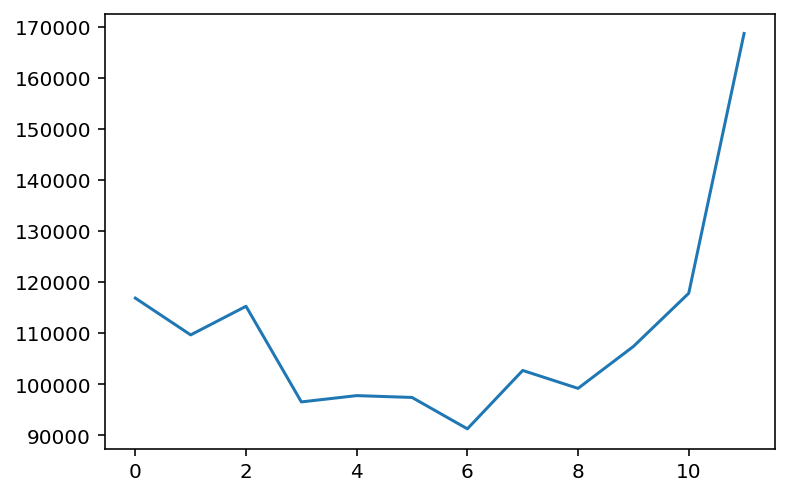

In [83]:
plt.plot(ft_cnt_per_month)
plt.show()

## 15ÎÖÑÎèÑ

In [84]:
# 15_jan
fft_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([24])]
fft_num_item_cnt_jan = fft_cnt_jan['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_jan

110971.0

In [85]:
# 15_feb
fft_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([25])]
fft_num_item_cnt_feb = fft_cnt_feb['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_feb

84198.0

In [86]:
# 15_mar
fft_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([26])]
fft_num_item_cnt_mar = fft_cnt_mar['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_mar

82014.0

In [87]:
# 15_apr
fft_cnt_apr = num_item_cnt[num_item_cnt['date_block_num'].isin([27])]
fft_num_item_cnt_apr = fft_cnt_apr['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_apr

77827.0

In [88]:
# 15_may
fft_cnt_may = num_item_cnt[num_item_cnt['date_block_num'].isin([28])]
fft_num_item_cnt_may = fft_cnt_may['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_may

72295.0

In [89]:
# 15_jun
fft_cnt_jun = num_item_cnt[num_item_cnt['date_block_num'].isin([29])]
fft_num_item_cnt_jun = fft_cnt_jun['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_jun

64114.0

In [90]:
# 15_jul
fft_cnt_jul = num_item_cnt[num_item_cnt['date_block_num'].isin([30])]
fft_num_item_cnt_jul = fft_cnt_jul['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_jul

63187.0

In [91]:
# 15_aug
fft_cnt_aug = num_item_cnt[num_item_cnt['date_block_num'].isin([31])]
fft_num_item_cnt_aug = fft_cnt_aug['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_aug

66079.0

In [92]:
# 15_sep
fft_cnt_sep = num_item_cnt[num_item_cnt['date_block_num'].isin([32])]
fft_num_item_cnt_sep = fft_cnt_sep['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_sep

72843.0

In [93]:
# 15_oct
fft_cnt_oct = num_item_cnt[num_item_cnt['date_block_num'].isin([33])]
fft_num_item_cnt_oct = fft_cnt_oct['item_cnt_day'].sum(axis=0) # axis=0 -> ÏÑ∏Î°úÌï©
fft_num_item_cnt_oct

71056.0

In [94]:
fft_cnt_per_month = (fft_num_item_cnt_jan,
                     fft_num_item_cnt_feb,
                     fft_num_item_cnt_mar,
                     fft_num_item_cnt_apr,
                     fft_num_item_cnt_may,
                     fft_num_item_cnt_jun,
                     fft_num_item_cnt_jul,
                     fft_num_item_cnt_aug,
                     fft_num_item_cnt_sep,
                     fft_num_item_cnt_oct)

In [95]:
type(fft_cnt_per_month)

tuple

In [96]:
fft_cnt_per_month = list(fft_cnt_per_month)
type(fft_cnt_per_month)

list

In [97]:
plt.plot(fft_cnt_per_month)
plt.show()

## Î™®Ïùå

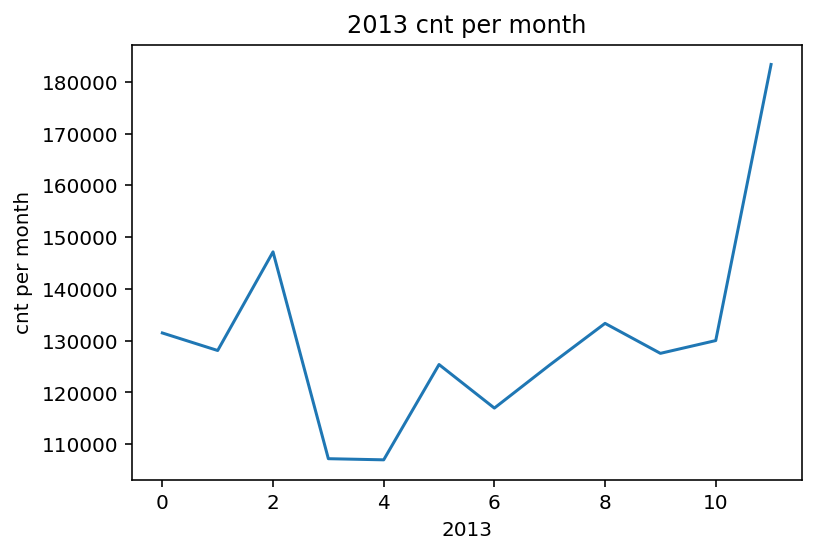

In [98]:
plt.plot(cnt_per_month)
plt.xlabel('2013')
plt.ylabel('cnt per month')
plt.title('2013 cnt per month')
plt.show()

In [99]:
plt.plot(ft_cnt_per_month)
plt.xlabel('2014')
plt.ylabel('cnt per month')
plt.title('2014 cnt per month')
plt.show()

13ÎÖÑÎèÑÏùò ÏõîÌåêÎß§ÎüâÍ≥º 14ÎÖÑÎèÑÏùò ÏõîÌåêÎß§ÎüâÏù¥ ÏïÑÏ£º ÎπÑÏä∑Ìïú Í∑∏ÎûòÌîÑÎ•º Î≥¥ÏòÄÎã§. ÌäπÌûà 12ÏõîÏóê ÌåêÎß§ÎüâÏù¥ Í∏âÏ¶ùÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Î•º Ïù¥ÏÉÅÏπòÎ•º ÎëêÍ∏∞Î°úÌñàÎã§.  
Ïù¥ÏÉÅÏπòÏùò Ï≤´Î≤àÏß∏ Î∞©Î≤ïÏùÄ 12Ïõî dataÎ•º Î™®Îëê Î¨¥ÏãúÌïòÎäî Í≤ÉÏù¥ÏóàÍ≥†,  
ÎëêÎ≤àÏß∏Îäî 12ÏõîÍ≥º 1ÏõîÏóê sale ÎÇ†ÏßúÎ•º ÏÑ∏Ïã¨ÌïòÍ≤å Ï†úÏô∏ÌïòÎäî Í≤ÉÏù¥Îã§.  

In [100]:
plt.plot(fft_cnt_per_month)
plt.xlabel('2015')
plt.ylabel('cnt per month')
plt.title('2015 cnt per month')
plt.show()

# 4Í∞ÄÏßÄ Îã§Î•∏ Î∞©Î≤ïÏúºÎ°ú Ï≤òÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞

**1. pure data + 3Í∞ÄÏßÄ Î™®Îç∏Ïùò AveragingBlending**  
ÏïÑÎ¨¥Í≤ÉÎèÑ Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÍ≥† 3Í∞ÄÏßÄ Î™®Îç∏Ïùò ÎèåÎ†∏ÏùÑ Îïå scoreÎäî 2.14473Í∞Ä ÎÇòÏôîÎã§.  
Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥ÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏïòÎçò Î∂ÄÎ∂ÑÎì§ÏùÑ Ï≤òÎ¶¨ÌïòÎ©∞ Îã§Î•∏ ÏãúÎèÑÎ•º ÌñàÎã§.  
  
**2. 12Ïõî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏßÄÏö∞Í≥† 1Í∞ÄÏßÄ Î™®Îç∏(lightGBM)**  
Ïù¥ÏÉÅÏπòÍ∞Ä Í∞ÄÏû• ÎßéÏïòÎçò 13ÎÖÑ, 14ÎÖÑ 12Ïõî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏßÄÏö∞Í≥† Î™®Îç∏ÏùÑ ÎèåÎ†∏ÎçîÎãà scoreÍ∞Ä 2.36042ÏúºÎ°ú Ï≤òÏùåÎ≥¥Îã§ ÎÜíÍ≤å ÎÇòÏôîÎã§.  
Í∑∏ÎûòÏÑú ÍººÍººÌïòÍ≤å ÏÑ∏ÏùºÍ∏∞Í∞ÑÏùò dataÎßå ÏßÄÏö∞Í≥† Îã§Ïãú ÏãúÎèÑÌñàÎã§.   
  
**3. ÏÑ∏Ïùº Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÏßÄÏö∞Í≥† 1Í∞ÄÏßÄ Î™®Îç∏(lightGBM)**  
kaggle score : 1.54639 
sale Í∏∞Í∞ÑÎßå ÏßÄÏõ†ÎçîÎãà ÏÑ±Îä•Ïù¥ ÎßéÏù¥ Ï¢ãÏïÑÏ°åÎã§.  
ÏïûÏúºÎ°úÎèÑ Ïù¥ÏÉÅÏπòÎ•º ÎåÄÌï† Îïå Î≠âÌÖÖÏù¥Î°ú Ïû°Îäî Í≤É Î≥¥Îã§Îäî Îç∞Ïù¥ÌÑ∞Î•º ÏûêÏÑ∏Ìûà Î≥¥Í≥† ÏÑ∏Ïã¨ÌïòÍ≤å Î∂ÑÎ¶¨Ìï¥ÏïºÍ≤†Îã§Í≥† ÎäêÍºàÎã§.  

**4. 3Î≤à + 'shuffle = False'**  
Ïä§ÏΩîÏñ¥Í∞Ä Í∞ÄÏû• Ï¢ãÏùÄ 3Î≤àÏùò Ï°∞Í±¥Ïóê random_stateÎ•º ÏßÄÏö∞Í≥† 'shuffle = False' Î•º Ï∂îÍ∞ÄÌñàÎã§.  
Ïù¥Ïú†Îäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏàúÏÑúÎåÄÎ°ú ÌïôÏäµÎêòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  
kaggle score : 1.62635  
randomÏóÜÏù¥ ÎèåÎ¶¨Î©¥ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßà Í≤É Ïù¥ÎùºÍ≥† Í∏∞ÎåÄÌñàÎäîÎç∞,  Ïò§ÌûàÎ†§ Îçî ÏïàÏ¢ãÏïÑÏ°åÎã§.  
Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÍ≥† ÎÇòÏÑúÎäî randomÌïú ÌïôÏäµÏù¥ Îçî Ï¢ãÏùÄ Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï¥ Î≥º Ïàò ÏûàÎã§. 

# baseline model

In [101]:
y = data['item_cnt_day']

del data['item_cnt_day']

print(data.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price'], dtype='object')


In [102]:
del data['date']

print(data.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price'], dtype='object')


##  Average Blending
Ïö∞Î¶¨Îäî Ïù¥Î≤àÏóê ÌöåÍ∑Ä Î¨∏Ï†úÎ•º ÌíÄÍ≥† ÏûàÏúºÎØÄÎ°ú, ÏúÑ Î∂ÑÎ•òÍ∏∞Ïùò ÏïôÏÉÅÎ∏îÏ≤òÎüº Ìà¨ÌëúÎ°ú Ï†ïÌïòÎäî ÎåÄÏã† ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑† ÎÇ¥Ïñ¥ ÌôúÏö©Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.  
Ïó¨Îü¨ Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà†ÌèâÍ∑†ÌïòÏó¨ Î∏îÎ†åÎî© Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
Î™®Îç∏ÏùÄ Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥Ïù∏ gboost, xgboost, lightgbm ÏÑ∏ Í∞ÄÏßÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [103]:
gboost = GradientBoostingRegressor(random_state=2021)
xgboost = xgb.XGBRegressor(random_state=2021)
lightgbm = lgb.LGBMRegressor(random_state=2021)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


In [106]:
models = [{'model':lightgbm, 'name':'LightGBM'}]

## Cross Validation  
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [107]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2021).get_n_splits(data.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                  np.mean(cross_val_score(m['model'],  #  R^2Ï†êÏàòÎ•º Î∞òÌôò
                                                                          data.values, 
                                                                          y)), 
                                                  kf=kfold))
print('Ïñçüí¢')

Ïñçüí¢


In [108]:
get_cv_score(models)

Model LightGBM CV score : 0.0560


## Make Submission File
cross_val_score() Ìï®ÏàòÎäî ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Ï†ÑÎã¨Ìï† Í≤ΩÏö∞ R^2Ï†êÏàòÎ•º Î∞òÌôòÌï©ÎãàÎã§.  
Îã§ÏùåÍ≥º Í∞ôÏù¥ Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÏûÖÎ†•ÌïòÎ©¥ Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑† ÎÇ¥Ïñ¥ Ï£ºÎäî AgeragingBlending() Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ ÏÇ¨Ïö©Ìï©ÎãàÎã§.  AgeragingBlending() Ìï®ÏàòÎäî models ÎîïÏÖîÎÑàÎ¶¨ ÏïàÏóê ÏûàÎäî Î™®Îç∏ÏùÑ Î™®Îëê xÏôÄ yÎ°ú ÌïôÏäµÏãúÌÇ® Îí§ predictionsÏóê Í∑∏ ÏòàÏ∏° Í≤∞Í¥èÍ∞íÏùÑ Î™®ÏïÑÏÑú ÌèâÍ∑†Ìïú Í∞íÏùÑ Î∞òÌôòÌï©ÎãàÎã§.  

In [109]:
def AveragingBlending(models, data, y, sub_x):
    for m in models : 
        m['model'].fit(data.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

Ìï®ÏàòÎ•º ÌôúÏö©Ìï¥ÏÑú ÏòàÏ∏°Í∞íÏùÑ ÏÉùÏÑ±

In [110]:
test_data_path = join(data_dir, 'test.csv')
sub = pd.read_csv(test_data_path)

data = pd.read_csv(train_data_path) 
del data['date']
del data['item_cnt_day']
del data['date_block_num']

data_models = data
data_models

shop_id  item_id  item_price
0             59    22154      999.00
1             25     2552      899.00
2             25     2552      899.00
3             25     2554     1709.05
4             25     2555     1099.00
...          ...      ...         ...
2935844       25     7409      299.00
2935845       25     7460      299.00
2935846       25     7459      349.00
2935847       25     7440      299.00
2935848       25     7460      299.00

[2935849 rows x 3 columns]

In [111]:
y_pred = AveragingBlending(models, data_models, y, sub)
print(len(y_pred))
y_pred

214200


array([1.04777584, 1.02315981, 1.02315981, ..., 1.14722235, 1.22082714,
       1.12374012])

In [112]:
print(data.columns)
print(test.columns)

Index(['shop_id', 'item_id', 'item_price'], dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')


## Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú

In [113]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [114]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : y_pred})

result.head()

ID  item_cnt_month
0   0        1.047776
1   1        1.023160
2   2        1.023160
3   3        1.023160
4   4        1.023160

In [115]:
my_submission_path = join(data_dir, 'submission_lightGBM.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj35/aiffel/Exploration/1st_hackathon/submission_lightGBM.csv


kaggle score : 2.14473  
ÌäπÎ≥ÑÌïú Ï†ÑÏ≤òÎ¶¨ ÏóÜÏù¥ 3Í∞úÏùò Î™®Îç∏ÏùÑ Ï†ÅÏ†àÌûà ÏÑûÏñ¥ÏÑú ÏßÑÌñâÌñàÏùÑ ÎïåÏùò scoreÏù¥Îã§.  


# Ïù¥ÏÉÅÏπò 12Ïõî Îç∞Ïù¥ÌÑ∞ Î™®ÎëêÎ•º ÏßÄÏö∞Í≥†

In [117]:
print(data.columns)

Index(['shop_id', 'item_id', 'item_price'], dtype='object')


In [118]:
# 12ÏõîÏùÑ Ï†úÏô∏Ìïú data
data = pd.read_csv(train_data_path)
except_data = data[data['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9,10,
                                          12,13,14,15,16,17,18,19,20,21,22,
                                          24,25,26,27,28,29,30,31,32,33])]
except_data

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2661817 rows x 6 columns]

In [119]:
y = except_data['item_cnt_day']

In [120]:
del except_data['item_cnt_day'] 
del except_data['date']

print(except_data.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price'], dtype='object')


##  Average Blending & Cross Validation & Make Submission File

In [121]:
def except_get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2021).get_n_splits(except_data.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                  np.mean(cross_val_score(m['model'],  #  R^2Ï†êÏàòÎ•º Î∞òÌôò
                                                                          except_data.values, 
                                                                          y)), 
                                                  kf=kfold))
print('Ïñçüí¢')

Ïñçüí¢


In [123]:
models = [{'model':lightgbm, 'name':'LightGBM'}]

In [124]:
except_get_cv_score(models)

Model LightGBM CV score : -0.1344


In [125]:
test_data_path = join(data_dir, 'test.csv')
sub = pd.read_csv(test_data_path)

del except_data['date_block_num']

except_data_models = except_data
except_data_models

shop_id  item_id  item_price
0             59    22154      999.00
1             25     2552      899.00
2             25     2552      899.00
3             25     2554     1709.05
4             25     2555     1099.00
...          ...      ...         ...
2935844       25     7409      299.00
2935845       25     7460      299.00
2935846       25     7459      349.00
2935847       25     7440      299.00
2935848       25     7460      299.00

[2661817 rows x 3 columns]

In [126]:
except_y_pred = AveragingBlending(models, except_data_models, y, sub)
print(len(except_y_pred))
except_y_pred

214200


array([1.01114329, 0.97452104, 0.97452104, ..., 0.98577829, 1.01763632,
       1.08737327])

## Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú

In [127]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [128]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : except_y_pred})

result.head()

ID  item_cnt_month
0   0        1.011143
1   1        0.974521
2   2        0.974521
3   3        0.974521
4   4        0.974521

In [129]:
except_submission_path = join(data_dir, 'except_submission.csv')
result.to_csv(except_submission_path, index=False)

print(except_submission_path)

/home/aiffel-dj35/aiffel/Exploration/1st_hackathon/except_submission.csv


kaggle score : 2.36042  
Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÄ 12Ïõî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏßÄÏõ†ÎçîÎãà Ïò§ÌûàÎ†§ Ïù¥ÏÉÅÏπòÍ∞Ä Ïò¨ÎùºÍ∞îÎã§.  
Í∑∏ÎûòÏÑú ÍººÍººÌïòÍ≤å ÏÑ∏ÏùºÍ∏∞Í∞ÑÏùò dataÎßå ÏßÄÏö∞Í≥† Îã§Ïãú ÏãúÎèÑÌñàÎã§.  

# ÏÑ∏Ïùº Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÏßÄÏö∞Í≥† & only lightGBM

In [130]:
data = pd.read_csv(train_data_path)
data

date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...               ...  
2935844           1.0  
2935845           1.0  
2935846           1.0  
2935847           1.0  
2935848           1.0  

[2935849 rows x 6 columns]

In [137]:
data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by = ['date'])
data

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
109593  2013-01-01               0       46    18616       349.0           1.0
85162   2013-01-01               0       54    11854       199.0           1.0
18128   2013-01-01               0       28     4906      1799.0           1.0
112216  2013-01-01               0       42     2931        99.0           1.0
85141   2013-01-01               0       54    11604       349.0           1.0
...            ...             ...      ...      ...         ...           ...
2915898 2015-12-10              33        6     7390       349.0           1.0
2915896 2015-12-10              33        6     7350       349.0           1.0
2922604 2015-12-10              33       28    10304       199.0           1.0
2915871 2015-12-10              33        6     6798      1849.0           1.0
2898514 2015-12-10              33       58    10207      1199.0           1.0

[2935849 rows x 6 columns]

In [138]:
# ÏÑ∏Ïùº Í∏∞Í∞ÑÎßå ÏûêÎ•¥Í∏∞ 
data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by = ['date'])


from datetime import datetime, timedelta

year_end_start1 = datetime(2013,12,25)
year_end_end1 = datetime(2014,1,7)

year_end_start2 = datetime(2014,12,25)
year_end_end2 = datetime(2015,1,7)


def del_vargen_period(data) :  
    if (year_end_start1 <= data['date'] <= year_end_end1) or (year_end_start2 <= data['date'] <= year_end_end2) :
        return False
    return True
train_data_del_dec = data[data.apply(lambda x : del_vargen_period(x), axis = 1)]


In [139]:
train_data_del_dec

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
109593  2013-01-01               0       46    18616       349.0           1.0
85162   2013-01-01               0       54    11854       199.0           1.0
18128   2013-01-01               0       28     4906      1799.0           1.0
112216  2013-01-01               0       42     2931        99.0           1.0
85141   2013-01-01               0       54    11604       349.0           1.0
...            ...             ...      ...      ...         ...           ...
2915898 2015-12-10              33        6     7390       349.0           1.0
2915896 2015-12-10              33        6     7350       349.0           1.0
2922604 2015-12-10              33       28    10304       199.0           1.0
2915871 2015-12-10              33        6     6798      1849.0           1.0
2898514 2015-12-10              33       58    10207      1199.0           1.0

[2797472 rows x 6 columns]

In [140]:
y = train_data_del_dec['item_cnt_day']

del train_data_del_dec['date']
del train_data_del_dec['item_cnt_day']
train_data_del_dec

date_block_num  shop_id  item_id  item_price
109593                0       46    18616       349.0
85162                 0       54    11854       199.0
18128                 0       28     4906      1799.0
112216                0       42     2931        99.0
85141                 0       54    11604       349.0
...                 ...      ...      ...         ...
2915898              33        6     7390       349.0
2915896              33        6     7350       349.0
2922604              33       28    10304       199.0
2915871              33        6     6798      1849.0
2898514              33       58    10207      1199.0

[2797472 rows x 4 columns]

In [141]:
gboost = GradientBoostingRegressor(random_state=2021)
xgboost = xgb.XGBRegressor(random_state=2021)
lightgbm = lgb.LGBMRegressor(random_state=2021)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


In [142]:
def del_get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2021).get_n_splits(train_data_del_dec.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                  np.mean(cross_val_score(m['model'],  #  R^2Ï†êÏàòÎ•º Î∞òÌôò
                                                                          train_data_del_dec.values, 
                                                                          y)), 
                                                  kf=kfold))
print('Ïñçüí¢')

Ïñçüí¢


In [143]:
models = [{'model':lightgbm, 'name':'LightGBM'}]

In [144]:
del_get_cv_score(models)

Model LightGBM CV score : 0.1240


In [147]:
test_data_path = join(data_dir, 'test.csv')
sub = pd.read_csv(test_data_path)

# del train_data_del_dec['date']
del train_data_del_dec['date_block_num']
# del train_data_del_dec['item_price']
# del train_data_del_dec['item_cnt_day']

train_data_del_dec

shop_id  item_id  item_price
109593        46    18616       349.0
85162         54    11854       199.0
18128         28     4906      1799.0
112216        42     2931        99.0
85141         54    11604       349.0
...          ...      ...         ...
2915898        6     7390       349.0
2915896        6     7350       349.0
2922604       28    10304       199.0
2915871        6     6798      1849.0
2898514       58    10207      1199.0

[2797472 rows x 3 columns]

In [148]:
del_y_pred = AveragingBlending(models, train_data_del_dec, y, sub)
print(len(del_y_pred))
del_y_pred„Ñπ

214200


array([1.03128496, 0.99800748, 0.99800748, ..., 1.06033443, 1.13605409,
       1.09334061])

## Ï∫êÍ∏ÄÏóê Ï†úÏ∂ú

In [153]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [154]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : del_y_pred})

result.head()

ID  item_cnt_month
0   0        1.031285
1   1        0.998007
2   2        0.998007
3   3        0.998007
4   4        0.998007

In [155]:
del_submission_path = join(data_dir, 'del_submission.csv')
result.to_csv(del_submission_path, index=False)

print(del_submission_path)

/home/aiffel-dj35/aiffel/Exploration/1st_hackathon/del_submission.csv


kaggle score : 1.54639 
sale Í∏∞Í∞ÑÎßå ÏßÄÏõ†ÎçîÎãà ÏÑ±Îä•Ïù¥ ÎßéÏù¥ Ï¢ãÏïÑÏ°åÎã§.  
ÏïûÏúºÎ°úÎèÑ Ïù¥ÏÉÅÏπòÎ•º ÎåÄÌï† Îïå Î≠âÌÖÖÏù¥Î°ú Ïû°Îäî Í≤É Î≥¥Îã§Îäî Îç∞Ïù¥ÌÑ∞Î•º ÏûêÏÑ∏Ìûà Î≥¥Í≥† ÏÑ∏Ïã¨ÌïòÍ≤å Î∂ÑÎ¶¨Ìï¥ÏïºÍ≤†Îã§Í≥† ÎäêÍºàÎã§.  

## shuffle = False & lightGBM

In [156]:
# gboost = GradientBoostingRegressor(random_state=2021)
# xgboost = xgb.XGBRegressor(random_state=2021)
lightgbm = lgb.LGBMRegressor(random_state=2021)

models = [{'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


In [157]:
def del_get_cv_score(models):
    kfold = KFold(n_splits=2, shuffle = False).get_n_splits(train_data_del_dec.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                  np.mean(cross_val_score(m['model'],  #  R^2Ï†êÏàòÎ•º Î∞òÌôò
                                                                          train_data_del_dec.values, 
                                                                          y))))
print('Ïñçüí¢')

Ïñçüí¢


In [158]:
del_get_cv_score(models)

Model LightGBM CV score : 0.1246


In [159]:
del_y_pred = AveragingBlending(models, train_data_del_dec, y, sub)
print(len(del_y_pred))
del_y_pred

214200


array([1.03128496, 0.99800748, 0.99800748, ..., 1.06033443, 1.13605409,
       1.09334061])

In [160]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [161]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : del_y_pred})

result.head()

ID  item_cnt_month
0   0        1.031285
1   1        0.998007
2   2        0.998007
3   3        0.998007
4   4        0.998007

In [412]:
line_del_submission_path = join(data_dir, 'line_del_submission.csv')
result.to_csv(line_del_submission_path, index=False)

print(line_del_submission_path)

/home/aiffel-dj35/aiffel/Exploration/1st_hackathon/line_del_submission.csv


kaggle score : 1.62635  
randomÏóÜÏù¥ ÎèåÎ¶¨Î©¥ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßà Í≤É Ïù¥ÎùºÍ≥† Í∏∞ÎåÄÌñàÎäîÎç∞,  Ïò§ÌûàÎ†§ Îçî ÏïàÏ¢ãÏïÑÏ°åÎã§.  
ÏôúÏù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÎäîÏßÄ Í≥µÎ∂ÄÎ•º Ìï¥Ïïº Îê† Í≤ÉÍ∞ôÎã§.  


# by ÌòúÎØ∏Îãò

In [167]:
data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by = ['date'])


from datetime import datetime, timedelta

year_end_start1 = datetime(2013,12,25)
year_end_end1 = datetime(2014,1,7)

year_end_start2 = datetime(2014,12,25)
year_end_end2 = datetime(2015,1,7)


def del_vargen_period(data) :  
    if (year_end_start1 <= data['date'] <= year_end_end1) or (year_end_start2 <= data['date'] <= year_end_end2) :
        return False
    return True
train_data_del_dec = data[data.apply(lambda x : del_vargen_period(x), axis = 1)]

In [168]:
from sklearn.model_selection import train_test_split

train_label = train_data_del_dec['item_cnt_day']
train_data_only = train_data_del_dec
del train_data_only['date']
del train_data_only['item_cnt_day']
del train_data_only['date_block_num']


In [169]:
X_train, X_test, y_train, y_test = train_test_split(train_data_only, train_label,test_size = 0.1, shuffle = False)

In [171]:
# with open('special_day.txt', 'w') as f:
#     print(special_days, file=f)

In [172]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

In [173]:
xgboost = xgb.XGBRegressor(random_state=2019)

models = [ {'model':xgboost, 'name':'XGBoost'}]

In [176]:
from sklearn.metrics import mean_squared_error

df = {}
def containNaN(list) :
    list_array = np.array(list)
    np.nan_to_num(list_array, copy=False)
    return list_array.tolist()

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def get_scores(models, train, y):
    for model in models:
        model_name = model['name']
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, shuffle=False, test_size=0.2)
        
        model['model'].fit(X_train, y_train)
        
        y_pred = model['model'].predict(X_test)
        
        containNaN(y_pred)        
        
        print(y_pred)
        
        df[model_name] = rmse(y_test, y_pred)
        
        print(df[model_name])
        
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
    return score_df 

get_scores(models,train_data_only, y)

[1.163512  1.2610828 1.2597486 ... 1.2183428 1.2422136 1.2591693]
4.204905605312096


RMSE
XGBoost  4.204906

In [179]:
hm_y_pred = AveragingBlending(models, train_data_only, y, sub)
print(len(hm_y_pred))
hm_y_pred

214200


array([0.96034205, 1.1295055 , 1.976069  , ..., 0.9605356 , 1.1685128 ,
       1.281304  ], dtype=float32)

## Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌïòÍ∏∞

In [177]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5

In [181]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : hm_y_pred})

result.head()

ID  item_cnt_month
0   0        0.960342
1   1        1.129506
2   2        1.976069
3   3        1.876275
4   4        1.874744

In [182]:
hm_submission_path = join(data_dir, 'hm_submission.csv')
result.to_csv(hm_submission_path, index=False)

print(hm_submission_path)

/home/aiffel-dj35/aiffel/Exploration/1st_hackathon/hm_submission.csv


kaggle score : 2.18450


## 2Ï∞®Ïõê graph

In [190]:
data = pd.read_csv(train_data_path)

items = data.groupby(['item_id'])['item_cnt_day'].sum().sort_values(ascending=False)
items_cnt_over_mean = items[items.apply(lambda x : x > 168.0)].index

special_days = {}
count = 0
for i in items_cnt_over_mean : 
    #print(i)
    item_record = data[data.apply(lambda x : x['item_id'] == i , axis = 1)]
    item_record = item_record.groupby(['date']).sum(['item_cnt_day'])
    special_day = item_record['item_cnt_day'].idxmax()
    if special_day in special_days :
        special_days[special_day] += 1
    else :
        special_days[special_day] = 1
    count += 1
    if count == 30 : 
        break

In [191]:
print(special_days)

{'15.01.2015': 1, '07.06.2013': 1, '17.09.2013': 2, '27.12.2014': 2, '29.11.2013': 4, '14.04.2015': 1, '29.10.2013': 1, '14.06.2013': 1, '14.12.2013': 1, '26.09.2013': 1, '21.02.2013': 1, '02.01.2013': 1, '30.12.2013': 1, '12.03.2013': 2, '15.04.2014': 1, '24.08.2013': 1, '28.10.2015': 1, '31.12.2014': 1, '18.11.2014': 1, '30.07.2014': 1, '19.05.2015': 1, '30.12.2014': 1, '03.09.2014': 1, '05.07.2013': 1}


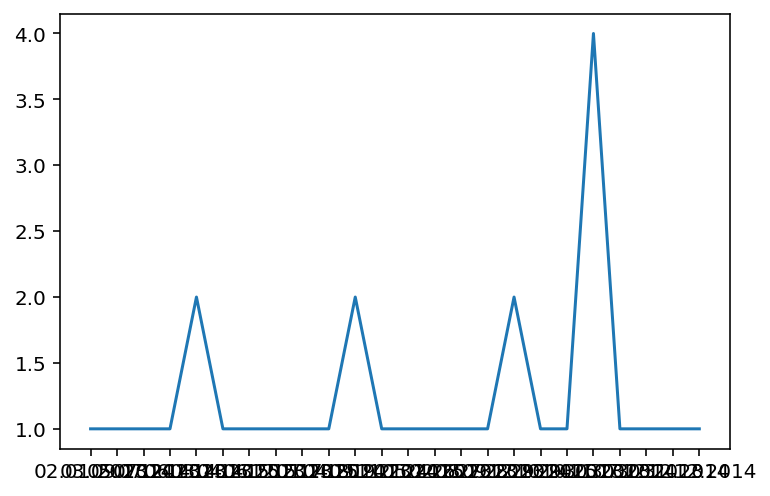

In [192]:
plt.plot(*zip(*sorted(special_days.items())))
plt.show()

**Ïó¨Í∏∞ÏÑú Ï£ºÏùòÌï¥Ïïº ÌïòÎäî Ï†ê**
Ïö∞Î¶¨Îäî ÏãúÍ∞ÑÏùò ÌùêÎ¶ÑÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Í∞Ä Î≥ÄÌïúÎã§Í≥† Í∞ÄÏ†ïÏùÑ ÏÑ∏Ïõ†Í∏∞ ÎïåÎ¨∏Ïóê, k foldÎ•º Ïì∏ Í≤ΩÏö∞ Ïñ¥Îäê Ï†ÑÏ≤¥ Í∏∞Í∞ÑÎì§Ïù¥ Í≥†Î•¥Í≤å Î∞òÏòÅÎêòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº Ï§ëÎ≥µÎêòÏÑú Î∞òÏòÅÎê† ÏàòÎèÑ ÏûàÎã§. Í∑∏ÎûòÏÑú k foldÎ•º Ïì∞ÏßÄ ÏïäÍ∏∞Î°ú Í≤∞Ï†ïÌñàÎã§. Í∑∏Î¶¨Í≥† ÌÖåÏä§Ìä∏Ìï† Îïå ÎßàÏßÄÎßâ ÎÇ†Ïßú Íµ¨Í∞ÑÎì§ÏùÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Îî∞Î°ú Î∂ÑÎ¶¨Ìï¥ÏÑú Ï†ïÌôïÎèÑÎ•º Ï∏°Ï†ïÌñàÎã§. 

# without kfold

In [418]:
data = pd.read_csv(train_data_path)

data['date'] = pd.to_datetime(data["date"])
data = data.sort_values(by = ['date'])

In [420]:
from datetime import datetime, timedelta

year_end_start1 = datetime(2013,12,25)
year_end_end1 = datetime(2014,1,7)

year_end_start2 = datetime(2014,12,25)
year_end_end2 = datetime(2015,1,7)


def del_vargen_period(data) :  
    if (year_end_start1 <= data['date'] <= year_end_end1) or (year_end_start2 <= data['date'] <= year_end_end2) :
        return False
    return True
train_data_del_dec = data[data.apply(lambda x : del_vargen_period(x), axis = 1)]

train_data_del_dec

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
109593  2013-01-01               0       46    18616       349.0           1.0
85162   2013-01-01               0       54    11854       199.0           1.0
18128   2013-01-01               0       28     4906      1799.0           1.0
112216  2013-01-01               0       42     2931        99.0           1.0
85141   2013-01-01               0       54    11604       349.0           1.0
...            ...             ...      ...      ...         ...           ...
2915898 2015-12-10              33        6     7390       349.0           1.0
2915896 2015-12-10              33        6     7350       349.0           1.0
2922604 2015-12-10              33       28    10304       199.0           1.0
2915871 2015-12-10              33        6     6798      1849.0           1.0
2898514 2015-12-10              33       58    10207      1199.0           1.0

[2797472 rows x 6 columns]

In [421]:
y = train_data_del_dec['item_cnt_day']

del train_data_del_dec['date']
del train_data_del_dec['item_price']
del train_data_del_dec['item_cnt_day']

train_data_del_dec

date_block_num  shop_id  item_id
109593                0       46    18616
85162                 0       54    11854
18128                 0       28     4906
112216                0       42     2931
85141                 0       54    11604
...                 ...      ...      ...
2915898              33        6     7390
2915896              33        6     7350
2922604              33       28    10304
2915871              33        6     6798
2898514              33       58    10207

[2797472 rows x 3 columns]

In [427]:
lightgbm = lgb.LGBMRegressor(random_state=2021)

models = [{'model':lightgbm, 'name':'LightGBM'}]

print('Ïñçüí¢')

Ïñçüí¢


In [428]:
def del_get_cv_score(models):
    kfold = KFold(n_splits=5, shuffle = False).get_n_splits(train_data_del_dec.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                  np.mean(cross_val_score(m['model'],  #  R^2Ï†êÏàòÎ•º Î∞òÌôò
                                                                          train_data_del_dec.values, 
                                                                          y))))
print('Ïñçüí¢')

Ïñçüí¢


In [429]:
del_get_cv_score(models)

Model LightGBM CV score : 0.1065


In [ ]:
del_y_pred = AveragingBlending(models, train_data_del_dec, y, sub)
print(len(del_y_pred))
del_y_pred

In [ ]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

In [ ]:
result = pd.DataFrame({'ID' : submission['ID'], 'item_cnt_month' : del_y_pred})

result.head()

In [ ]:
line_del_submission_path = join(data_dir, 'line_del_submission.csv')
result.to_csv(line_del_submission_path, index=False)

print(line_del_submission_path)

# Ï†êÏàòÎ•º Ïò¨Î†§Î≥¥Ïûê

In [309]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/1st_hackathon'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('Ïñçüí¢')

Ïñçüí¢


In [ ]:
y = train['item_price']
del train['item_price']

print(train.columns)
print(test.columns)

In [310]:
del train['date']
del train['item_cnt_day']

print(train.columns)
print(test.columns)

Index(['date_block_num', 'shop_id', 'item_id', 'item_price'], dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')


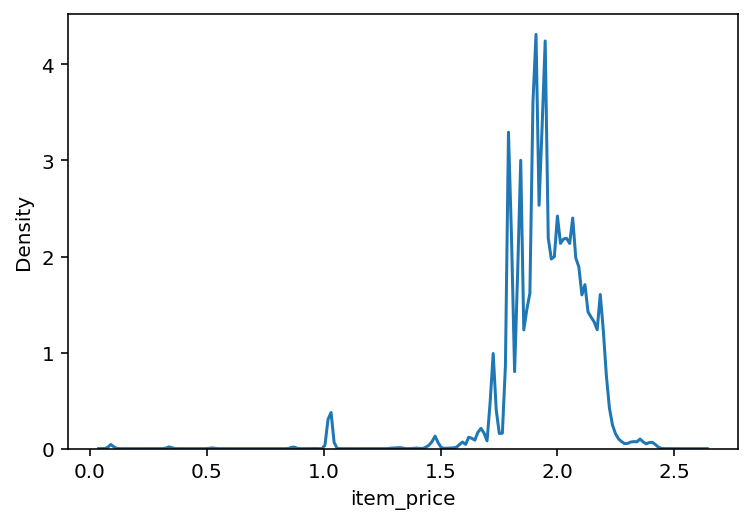

In [311]:
sns.kdeplot(y)
plt.show()

In [308]:
y = np.log1p(y)
y

0          2.067844
1          2.054431
2          2.054431
3          2.133489
4          2.079825
             ...   
2935844    1.902672
2935845    1.902672
2935846    1.925406
2935847    1.902672
2935848    1.902672
Name: item_price, Length: 2935849, dtype: float64

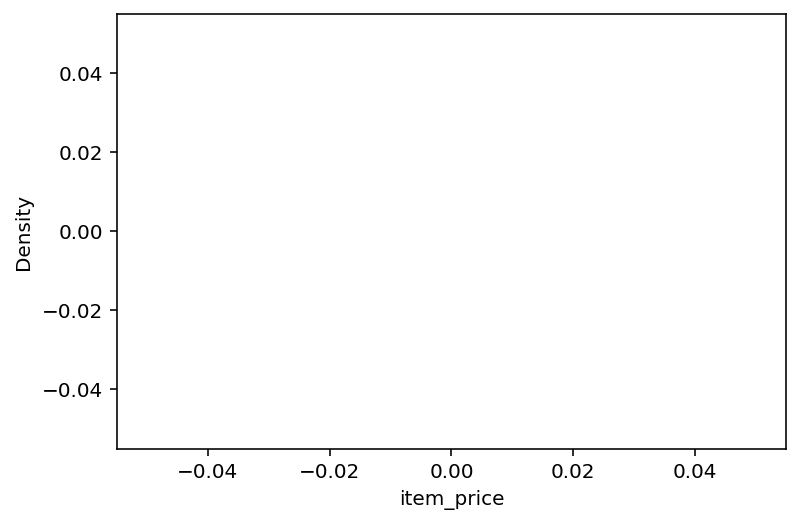

In [297]:
sns.kdeplot(y)
plt.show()

In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_cnt_day    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 112.0+ MB


# RMSE

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [301]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [302]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [303]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2021        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [304]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [305]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

ValueError: could not convert string to float: '18.08.2013'

# ÌïôÏäµ Í≥ºÏ†ïÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÌñàÎÇò? 

**1. pure data + 3Í∞ÄÏßÄ Î™®Îç∏Ïùò AveragingBlending**
ÏïÑÎ¨¥Í≤ÉÎèÑ Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÍ≥† 3Í∞ÄÏßÄ Î™®Îç∏Ïùò ÎèåÎ†∏ÏùÑ Îïå scoreÎäî 2.14473Í∞Ä ÎÇòÏôîÎã§.
Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥Î©¥ÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏïòÎçò Î∂ÄÎ∂ÑÎì§ÏùÑ Ï≤òÎ¶¨ÌïòÎ©∞ Îã§Î•∏ ÏãúÎèÑÎ•º ÌñàÎã§.
**2. 12Ïõî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏßÄÏö∞Í≥† 1Í∞ÄÏßÄ Î™®Îç∏(lightGBM)**
Ïù¥ÏÉÅÏπòÍ∞Ä Í∞ÄÏû• ÎßéÏïòÎçò 13ÎÖÑ, 14ÎÖÑ 12Ïõî Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê ÏßÄÏö∞Í≥† Î™®Îç∏ÏùÑ ÎèåÎ†∏ÎçîÎãà scoreÍ∞Ä 2.36042ÏúºÎ°ú Ï≤òÏùåÎ≥¥Îã§ ÎÜíÍ≤å ÎÇòÏôîÎã§.
Í∑∏ÎûòÏÑú ÍººÍººÌïòÍ≤å ÏÑ∏ÏùºÍ∏∞Í∞ÑÏùò dataÎßå ÏßÄÏö∞Í≥† Îã§Ïãú ÏãúÎèÑÌñàÎã§.
**3. ÏÑ∏Ïùº Í∏∞Í∞Ñ Îç∞Ïù¥ÌÑ∞ ÏßÄÏö∞Í≥† 1Í∞ÄÏßÄ Î™®Îç∏(lightGBM)**
kaggle score : 1.54639
sale Í∏∞Í∞ÑÎßå ÏßÄÏõ†ÎçîÎãà ÏÑ±Îä•Ïù¥ ÎßéÏù¥ Ï¢ãÏïÑÏ°åÎã§.
ÏïûÏúºÎ°úÎèÑ Ïù¥ÏÉÅÏπòÎ•º ÎåÄÌï† Îïå Î≠âÌÖÖÏù¥Î°ú Ïû°Îäî Í≤É Î≥¥Îã§Îäî Îç∞Ïù¥ÌÑ∞Î•º ÏûêÏÑ∏Ìûà Î≥¥Í≥† ÏÑ∏Ïã¨ÌïòÍ≤å Î∂ÑÎ¶¨Ìï¥ÏïºÍ≤†Îã§Í≥† ÎäêÍºàÎã§.
**4. 3Î≤à + 'shuffle = False'**
Ïä§ÏΩîÏñ¥Í∞Ä Í∞ÄÏû• Ï¢ãÏùÄ 3Î≤àÏùò Ï°∞Í±¥Ïóê random_stateÎ•º ÏßÄÏö∞Í≥† 'shuffle = False' Î•º Ï∂îÍ∞ÄÌñàÎã§.
Ïù¥Ïú†Îäî ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏàúÏÑúÎåÄÎ°ú ÌïôÏäµÎêòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
kaggle score : 1.62635
randomÏóÜÏù¥ ÎèåÎ¶¨Î©¥ Îçî ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßà Í≤É Ïù¥ÎùºÍ≥† Í∏∞ÎåÄÌñàÎäîÎç∞,  Ïò§ÌûàÎ†§ Îçî ÏïàÏ¢ãÏïÑÏ°åÎã§.
Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÍ≥† ÎÇòÏÑúÎäî randomÌïú ÌïôÏäµÏù¥ Îçî Ï¢ãÏùÄ Í≤ÉÏù¥ÎùºÍ≥† Ï∂îÏ∏°Ìï¥ Î≥º Ïàò ÏûàÎã§.

In [216]:
# E9-10Ï∞∏Ï°∞  
# RMSE Í≥ÑÏÇ∞
y = data['item_cnt_day']

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

In [ ]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

In [ ]:
gboost.__class__.__name__

In [ ]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

In [ ]:
df ={}

def get_scores(models, train, y):
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
    return score_df 

get_scores(models, train, y)

In [112]:
# 13_jan
tt_cnt_jan = num_item_cnt[num_item_cnt['date_block_num'].isin([0])]
tt_cnt_jan

date_block_num  item_id  item_cnt_day
0                    0    22154           1.0
1                    0     2552           1.0
2                    0     2552          -1.0
3                    0     2554           1.0
4                    0     2555           1.0
...                ...      ...           ...
115685               0       32           1.0
115686               0       32           1.0
115687               0       35           2.0
115688               0      621           1.0
115689               0       32           1.0

[115690 rows x 3 columns]

In [113]:
tt_cnt_jan = tt_cnt_jan.values
tt_cnt_jan

array([[ 0.0000e+00,  2.2154e+04,  1.0000e+00],
       [ 0.0000e+00,  2.5520e+03,  1.0000e+00],
       [ 0.0000e+00,  2.5520e+03, -1.0000e+00],
       ...,
       [ 0.0000e+00,  3.5000e+01,  2.0000e+00],
       [ 0.0000e+00,  6.2100e+02,  1.0000e+00],
       [ 0.0000e+00,  3.2000e+01,  1.0000e+00]])

In [114]:
tt_cnt_jan = tt_cnt_jan[:, 2]
tt_cnt_jan

array([ 1.,  1., -1., ...,  2.,  1.,  1.])

In [116]:
tt_cnt_jan = list(tt_cnt_jan)
sum(tt_cnt_jan)

131479.0

In [117]:
# 13_feb
tt_cnt_feb = num_item_cnt[num_item_cnt['date_block_num'].isin([1])]

tt_cnt_feb = tt_cnt_feb.values

tt_cnt_feb = tt_cnt_feb[:, 2] 

sum(tt_cnt_feb)

128090.0

In [118]:
# 13_mar
tt_cnt_mar = num_item_cnt[num_item_cnt['date_block_num'].isin([2])]

tt_cnt_mar = tt_cnt_mar.values

tt_cnt_mar = tt_cnt_mar[:, 2] 

sum(tt_cnt_mar)

147142.0

In [104]:
# 13ÎÖÑÎèÑ ÌåêÎß§
tt_cnt = num_item_cnt[num_item_cnt['date_block_num'].isin([0,1,2,3,4,5,6,7,8,9,10,11])]
tt_cnt

date  date_block_num  item_id  item_cnt_day
0        02.01.2013               0    22154           1.0
1        03.01.2013               0     2552           1.0
2        05.01.2013               0     2552          -1.0
3        06.01.2013               0     2554           1.0
4        15.01.2013               0     2555           1.0
...             ...             ...      ...           ...
1267557  06.12.2013              11     5671           1.0
1267558  01.12.2013              11     5671           3.0
1267559  26.12.2013              11     5669           2.0
1267560  25.12.2013              11     5669           1.0
1267561  19.12.2013              11     5671           1.0

[1267562 rows x 4 columns]

In [102]:
tt_cnt['date'] = pd.to_datetime(tt_cnt["date"])
tt_cnt

date  date_block_num  item_id  item_cnt_day
0       2013-02-01               0    22154           1.0
1       2013-03-01               0     2552           1.0
2       2013-05-01               0     2552          -1.0
3       2013-06-01               0     2554           1.0
4       2013-01-15               0     2555           1.0
...            ...             ...      ...           ...
1267557 2013-06-12              11     5671           1.0
1267558 2013-01-12              11     5671           3.0
1267559 2013-12-26              11     5669           2.0
1267560 2013-12-25              11     5669           1.0
1267561 2013-12-19              11     5671           1.0

[1267562 rows x 4 columns]

In [103]:
# tt_cnt = tt_cnt.sort_values(by = ['date_block_num'])
# tt_cnt

In [105]:
tt_items = tt_cnt.groupby(['item_id'])['item_cnt_day'].sum().sort_values(ascending=False)
tt_items

item_id
20949    63748.0
2808     12214.0
3732     11981.0
3734      7649.0
16787     6430.0
          ...   
4591         0.0
11871       -1.0
18062       -1.0
13474       -1.0
1590       -11.0
Name: item_cnt_day, Length: 14971, dtype: float64

In [106]:
tt_items.describe()

count    14971.000000
mean       104.384009
std        607.878383
min        -11.000000
25%          5.000000
50%         24.000000
75%         79.000000
max      63748.000000
Name: item_cnt_day, dtype: float64

In [107]:
type(tt_items)

pandas.core.series.Series

In [108]:
# series -> dataframe
tt_items = tt_items.to_frame()
tt_items

item_cnt_day
item_id              
20949         63748.0
2808          12214.0
3732          11981.0
3734           7649.0
16787          6430.0
...               ...
4591              0.0
11871            -1.0
18062            -1.0
13474            -1.0
1590            -11.0

[14971 rows x 1 columns]

In [91]:
print(tt_items[['item_cnt_day']])

         item_cnt_day
item_id              
20949         63748.0
2808          12214.0
3732          11981.0
3734           7649.0
16787          6430.0
...               ...
4591              0.0
11871            -1.0
18062            -1.0
13474            -1.0
1590            -11.0

[14971 rows x 1 columns]


# ÌöåÍ≥†

## ÌòúÎØ∏ 

Ïô†ÏßÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏãúÍ∞ÑÍ≥º Î∞ÄÏ†ëÌïú Ïó∞Í¥ÄÏù¥ ÏûàÏùÑ Í±∞ÎùºÍ≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞, ÌäπÏ†ï Ïù¥Î≤§Ìä∏Í∞Ä Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî ÌòÑÏÉÅÏù¥ ÎßåÏïΩ ÎÇ¥Í∞Ä ÏòàÏ∏°ÌïòÎäî ÌòÑÏÉÅÍ≥º Í¥ÄÎ†® ÏóÜÎäî ÌòÑÏÉÅÏù¥ÎùºÎ©¥ Ìå®ÌÑ¥ÏùÑ Î≥¥Ïó¨ÎèÑ ÌïôÏäµÏóêÎäî Ïù¥ÏÉÅÍ∞íÍ≥º ÎπÑÏä∑Ìïú Ïó≠Ìï†ÏùÑ ÌïòÎäî Í≤ÉÏùÑ Íπ®Îã¨ÏïòÎã§. Í∑∏ÎûòÏÑú ÏÇ¨Ïã§ ÏßÅÍ∞êÏúºÎ°ú ÌäπÏ†ï ÎÇ†Ïßú Íµ¨Í∞ÑÏóê Îì§Ïñ¥Ïò§Îäî Í∞íÎì§ÏùÑ ÏóÜÏï†Î≤ÑÎ¶¨Îäî Î∞©Î≤ïÏùÑ Îñ†Ïò¨Î†∏ÎäîÎç∞ Í∑∏ Îã§ÏùåÏóê Ï†ïÌôïÎèÑÍ∞Ä Ïò¨ÎûêÎã§. Ïù¥Í±∏ Ï¢Ä Îçî ÏùºÏ∞ç ÏïåÏïÑÏ∞®Î†∏ÎçîÎùºÎ©¥ Ìï¥Îãπ Îã¨ÏùÑ ÌÜµÏß∏Î°ú ÏóÜÏï†Î≤ÑÎ¶¨Í≥† ÌïôÏäµÌñàÎçîÎùºÎ©¥ Ïñ¥Îñ§ Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏùÑÏßÄ Í∂ÅÍ∏àÌïòÎã§. Í∑∏Î¶¨Í≥† Í∞ôÏù¥ Ìï¥Ï£ºÏã† Ïù∏Ïú†ÎãòÍªò ÎßéÏùÄ Í∞êÏÇ¨Î•º„Ö†„Ö†„Ö†

## Ïù∏Ïú†

Îü¨ÏãúÏïÑÏñ¥Î°ú Îêú Îç∞Ïù¥ÌÑ∞ÎùºÎãà, ÎãπÌô©ÌñàÎã§. Í∑∏ÎûòÎèÑ Ïñ¥Îñ§ Ï†úÌíàÏù¥ ÌåîÎ¶¥ Í≤ÉÏù∏Í∞ÄÏóê ÎåÄÌïú ÏòàÏÉÅÏùÑ ÌïòÎ©¥ ÎêòÎäî Í≤ÉÏù¥ÏóàÎã§. ÏãúÍ∞ÑÏù¥ ÎßéÏïòÎçîÎùºÎ©¥ Î≤àÏó≠Í∏∞Î•º ÌÜµÌï¥ Ïñ¥Îñ§ Ï†úÌíàÎì§Ïùò Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥† ÌñàÎçîÎùºÎ©¥ Îç∞Ïù¥ÌÑ∞Î•º ÏûêÏÑ∏ÌïòÍ≤å Î∂ÑÏÑùÏùÑ ÌïòÎäîÎç∞ ÎèÑÏõÄÏù¥ ÎêêÏùÑ Í≤ÉÏù¥Îùº ÏòàÏÉÅÎêúÎã§.
Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ Ïñ¥ÎñªÍ≤å Ìï†ÏßÄ ÏÉùÍ∞ÅÏùÄ Ïûò ÎêòÎäîÎç∞, Ïù¥Í≤ÉÏùÑ ÏΩîÎî©ÏúºÎ°ú Íµ¨ÌòÑÌïòÎäî ÏßÄÏ†êÏóêÏÑú ÎßéÏùÄ ÏãúÍ∞ÑÏùÑ Ìï†Ïï†ÌñàÎã§. ÏïÑÎ¨¥ÎûòÎèÑ pandasÏóê ÏùµÏàôÌï¥ÏßÄÎèÑÎ°ù FundamentalÏùÑ Î≥µÏäµÌï¥ÏïºÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÌñàÏóàÎã§.